#### Team List:

Effy Fang,  Ying Huang, Kai Li, Ziwei Zhao, Jenny Wang, 

# Project Background
### Abstract: Using the wine quality data to demostrate the application of some common data mining and machine learning tools.

## ● Part 1. Dataset

This project uses the two datasets (winequality-red.csv, winequality-white.csv) that are related to red and white variants of the Portuguese "Vinho Verde" wine. These data sets contain 1599 instances for red wine and 4898 instances for white wine with 11 physicochemical features, 1 quality attribute, and 1 reserved attribute that may be manually added later:<br>

○ Features:<br>
■ 1 - fixed acidity<br>
■ 2 - volatile acidity<br>
■ 3 - citric acid<br>
■ 4 - residual sugar<br>
■ 5 - chlorides<br>
■ 6 - free sulfur dioxide<br>
■ 7 - total sulfur dioxide<br>
■ 8 - density<br>
■ 9 - pH<br>
■ 10 - sulphates<br>
■ 11 - alcohol<br>

Output variable (based on sensory data):<br>
■ 12 - quality (score between 0 and 10)<br>

Randomed matched review attribute for modeling purpose:<br>
■ 13- review<br>

## ● Part 2. Objectives
○ Predict Wine Quality<br>
Leverage 11 features of physicochemical data to build different prediction model and predict the wine quality<br>

○ Classify Red and White wine<br>
There are 6 quality classes of red wine and 7 quality classes of white wine.<br>
If we can not see the bottle, purely based on features, can we tell white wine and red wine apart?<br>

○ How to make the wine better? For example, for wineries.<br>
Find the dominating features in the quality determination process. Wineries should focus on these features when making improvements.<br>

○ What to recommend to customers based on their purchase history? - Fore example, for retailers. <br>
Explore different methods to cluster the data using the 11 features. Build a recommendation system based on the clustering results.<br>

Future Work:<br>
■ Incorporate the review texts from tasters in the prediction model.<br>
■ Food and Wine Pairing Recommendation <br>
■ Based on the category of the food, give the recommendation of wine pairing based on the features of the wine, e.g. density and acidity.<br>

### Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

### Load  Data & Features Details

In [2]:
red = pd.read_csv("winequality-red.csv", sep=';')
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


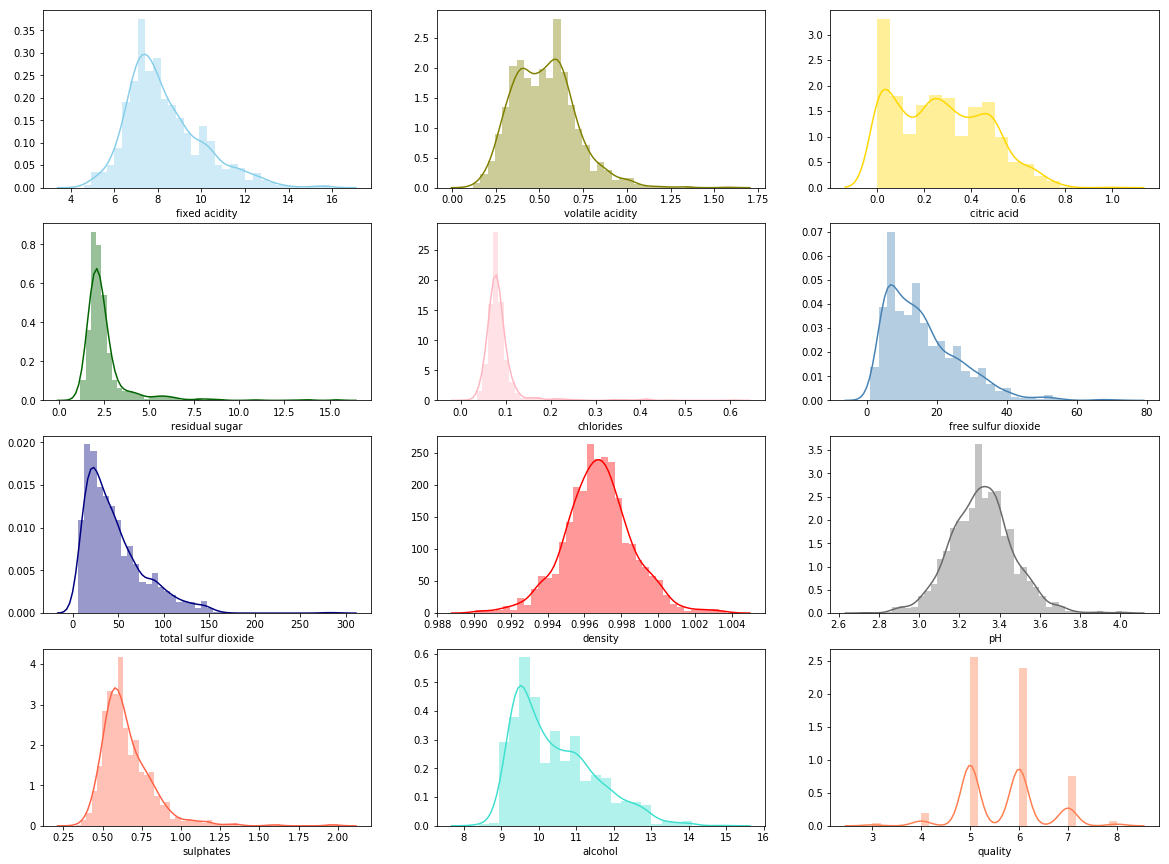

In [4]:
# histogram plots of all 11 features and quality 
f, axes = plt.subplots(4, 3, figsize=(20, 15), sharex=False)
sns.distplot( red["fixed acidity"] , color="skyblue",  ax=axes[0, 0])
sns.distplot( red["volatile acidity"] , color="olive", ax=axes[0, 1])
sns.distplot( red["citric acid"] , color="gold", ax=axes[0, 2])
sns.distplot( red["residual sugar"] , color="darkgreen", ax=axes[1, 0])
sns.distplot( red["chlorides"] , color="lightpink", ax=axes[1, 1])
sns.distplot( red["free sulfur dioxide"] , color="steelblue", ax=axes[1, 2])
sns.distplot( red["total sulfur dioxide"] , color="navy", ax=axes[2, 0])
sns.distplot( red["density"] , color="r", ax=axes[2, 1])
sns.distplot( red["pH"] , color="dimgrey", ax=axes[2, 2])
sns.distplot( red["sulphates"] , color="tomato", ax=axes[3, 0])
sns.distplot( red["alcohol"] , color="turquoise", ax=axes[3, 1])
sns.distplot( red["quality"] , color="coral", ax=axes[3, 2])

In [5]:
red['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

95% of the wine are in quality class 5 to 7. For the features, we can see some of them have nice distribution like density, while others are strongly skewed like total sulfur dioxide.   

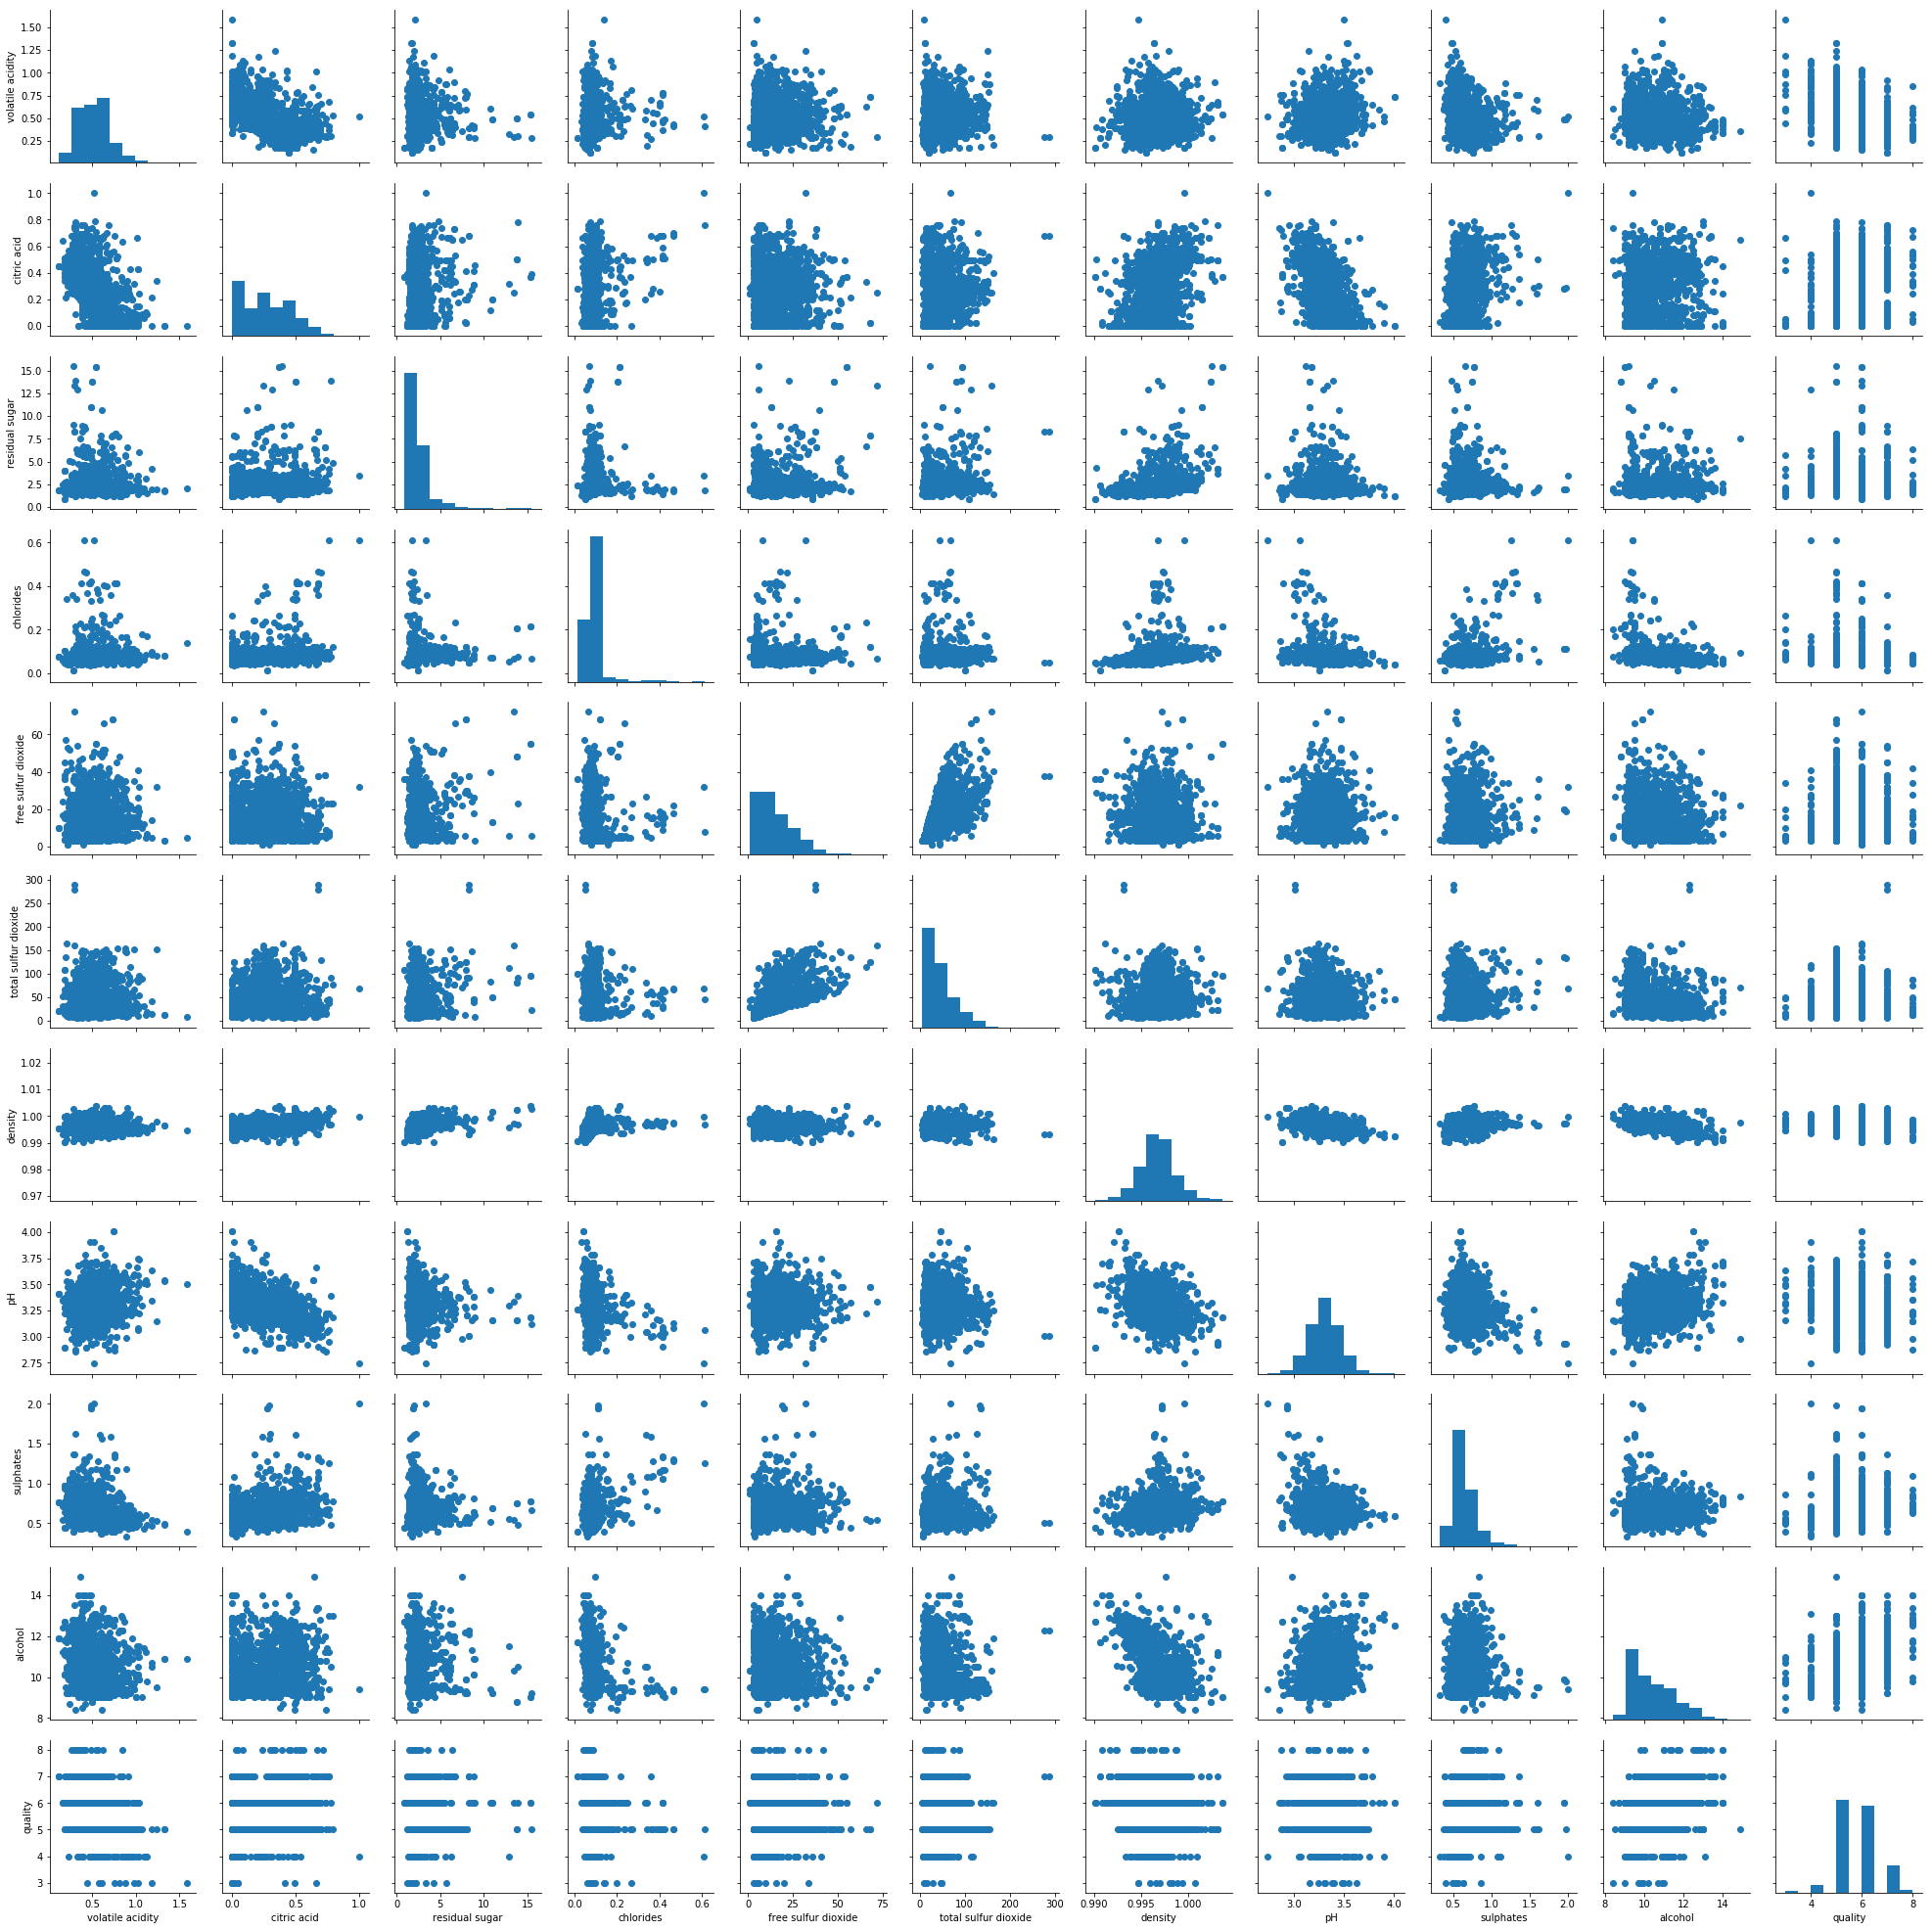

In [6]:
#PairGrid Plot
ax = sns.PairGrid(red, vars = red.iloc[:,1:13])
ax = ax.map_diag(plt.hist) 
ax = ax.map_offdiag(plt.scatter)
#ax = ax.add_legend()

There is no strong correlation between feature pairs from the gridpair diagram. However, we can see obvious outliers in the plot, thus we may need to detect and remove outlier later.

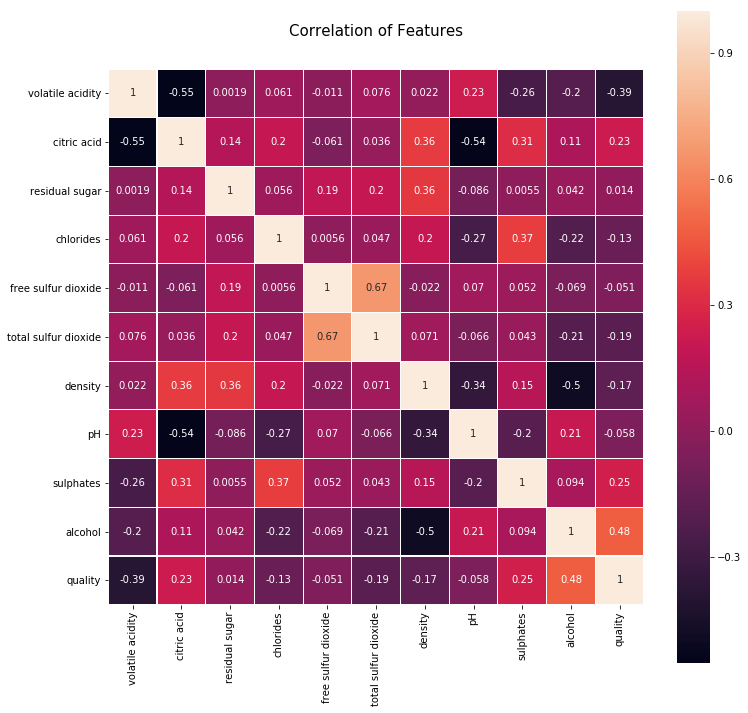

In [7]:
#Heat Map
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(red.iloc[:,1:13].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, 
            linecolor='white', annot=True)

For red wine, alcohol affects the quality of the wine the most. The correlation between alcohol and quality for red wine is 0.48. 

The 2nd, 3rd, and 4th important features that affect the alcohol quality the most for red wine are as the following: 

Red: volatile acidity (-0.39), sulphates (0.25), citric acid (0.23).

We tried to plot the top 2 influential feature against the quality and observe the upwarding trending. 

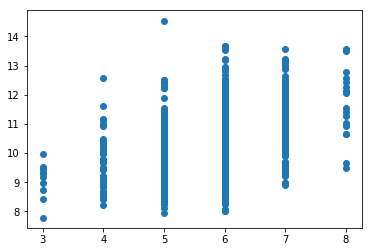

In [8]:
plt.scatter(red["quality"], -red['volatile acidity']+red['alcohol'])

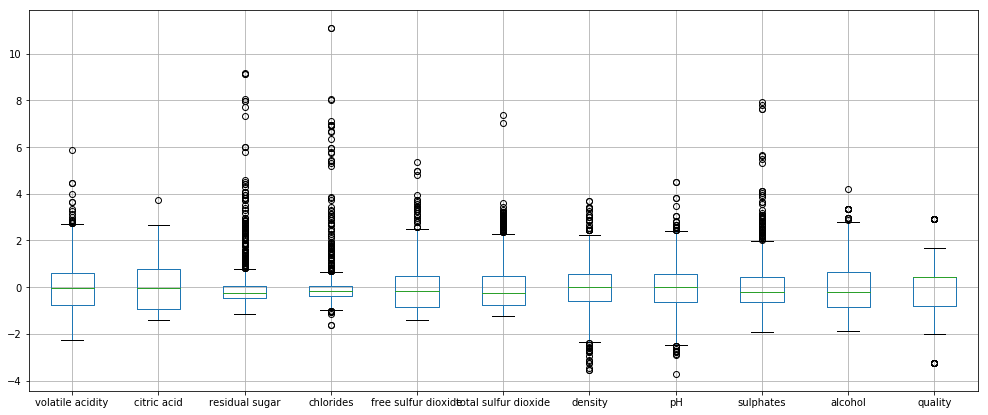

In [9]:
#BoxPlot
plt.figure(figsize=(17, 7))

((red.iloc[:,1:13] - red.iloc[:,1:13].mean()) / red.iloc[:,1:13].std()).boxplot()

## Statistical Method Outlier Detect - Interquartile Ranges & Outliers

In [10]:
# Dectecting outliers which are defined as outside of lower and upper whisker in the box plot
from collections import Counter


# outliers funtion: 
# df is the input data set
# variables are targeted features or column names
# n is number of features with potential outliers in each observation. eg. if n = 1, 
#             then the outliers are the rows with more than 1 features have outter trange values

def outliers(df, variables, n,a):
    outlier_indices = []
    for col in variables:
        upper = np.percentile(df[col], 75)
        lower = np.percentile(df[col], 25)
        IQR = upper - lower
        
        # Define outliers are outside of 1.5 IQR
        outliers_temp = (df[(df[col] < lower - IQR * a)|(df[col] > upper + IQR * a)] ).index
        outlier_indices.extend(outliers_temp)
        
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return(multiple_outliers)   

col_list = list(red.columns.values)

# return index list of outliers
Outliers_to_drop = outliers(red, col_list, 2,1.5)
print(Outliers_to_drop)
#print(col_list)

[353, 364, 366, 374, 440, 442, 538, 554, 555, 557, 559, 564, 652, 690, 1299, 151, 14, 15, 396, 400, 415, 515, 1114, 1244, 1358, 1434, 1435, 1474, 1476, 1558, 614, 695, 1319, 588, 821, 1269, 1270]
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


## Machine Learning Outlier Detect - DBSCAN


In [11]:
import math
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Treat data set as an unlabeled data set and impliment the DBSCAN to detect outliers
y = red.iloc[:,-1].values
X = red.iloc[:, :-1].values

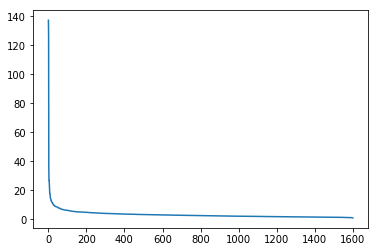

In [12]:
# determine the minimum number of reachable sample
min_sample = round(math.log(len(X)))

nbrs = NearestNeighbors(n_neighbors=min_sample).fit(X)
distances, indices = nbrs.kneighbors(X)
distanceDec = sorted(distances[:,-1], reverse=True)
knn_plot = plt.plot(list(range(1,len(X)+1)), distanceDec)

[0, 150, 0, 30]

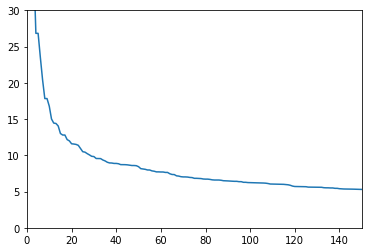

In [13]:
# zoom in on x=0 to 150 y=0 to 30 to find the elbow point
knn_plot = plt.plot(list(range(1,len(X)+1)), distanceDec)
plt.axis([0,150,0,30])

In [14]:
# DBSCAN method

# From the plot, the turnning point is around 10, so set the spslion is 10.
epslion = 10
dbsc = DBSCAN(eps = epslion, min_samples = min_sample).fit(X)
# Get the labels
labels = dbsc.labels_
# Identify the core points
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

In [15]:
# Check if there are two classses. The minor class (-1) suppouse to be outliers

unique_labels = np.unique(labels)
print(unique_labels)

# outlier s
outliers = np.where(labels == -1)
outliers = np.array(outliers).tolist()
outliers = outliers[0]

[-1  0]


Text(0, 0.5, 'Y')

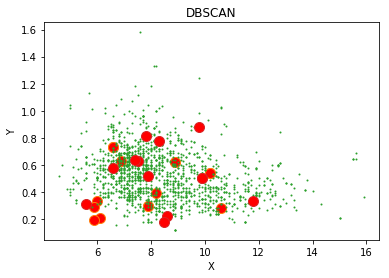

In [16]:
# Generate the plot

for (label) in zip(unique_labels):
    class_member_mask = (labels == label)
    xy = X[class_member_mask & core_samples]
    plt.plot(xy[:,0],xy[:,1], 'o', markerfacecolor = 'green', markersize = 1)
    
    xy2 = X[class_member_mask & ~core_samples]
    plt.plot(xy2[:,0],xy2[:,1], 'o', markerfacecolor = 'red', markersize = 10)
        
plt.title("DBSCAN")
plt.xlabel("X")
plt.ylabel("Y")

Some of the outliers deteced by the DBSCAN is out of or on the boundry of dataset, while others still blend in the middle of the dataset. Thus we decided to combined the result of two methods to make the detection as accurate as possible.

In [17]:
#Intercept of two outlier lists (DBSCAN method and statistical method)
outlier_list = set(Outliers_to_drop) & set(outliers)
outlier_list 

{14, 15, 396, 400, 1244, 1434, 1435, 1558}

In [18]:
#create column to indicate outlier, 1 indicates yes, 0 no
redoutlier = red.copy()
redoutlier['outlier'] = 0
for i in outlier_list:
    redoutlier.iloc[i,12]=1

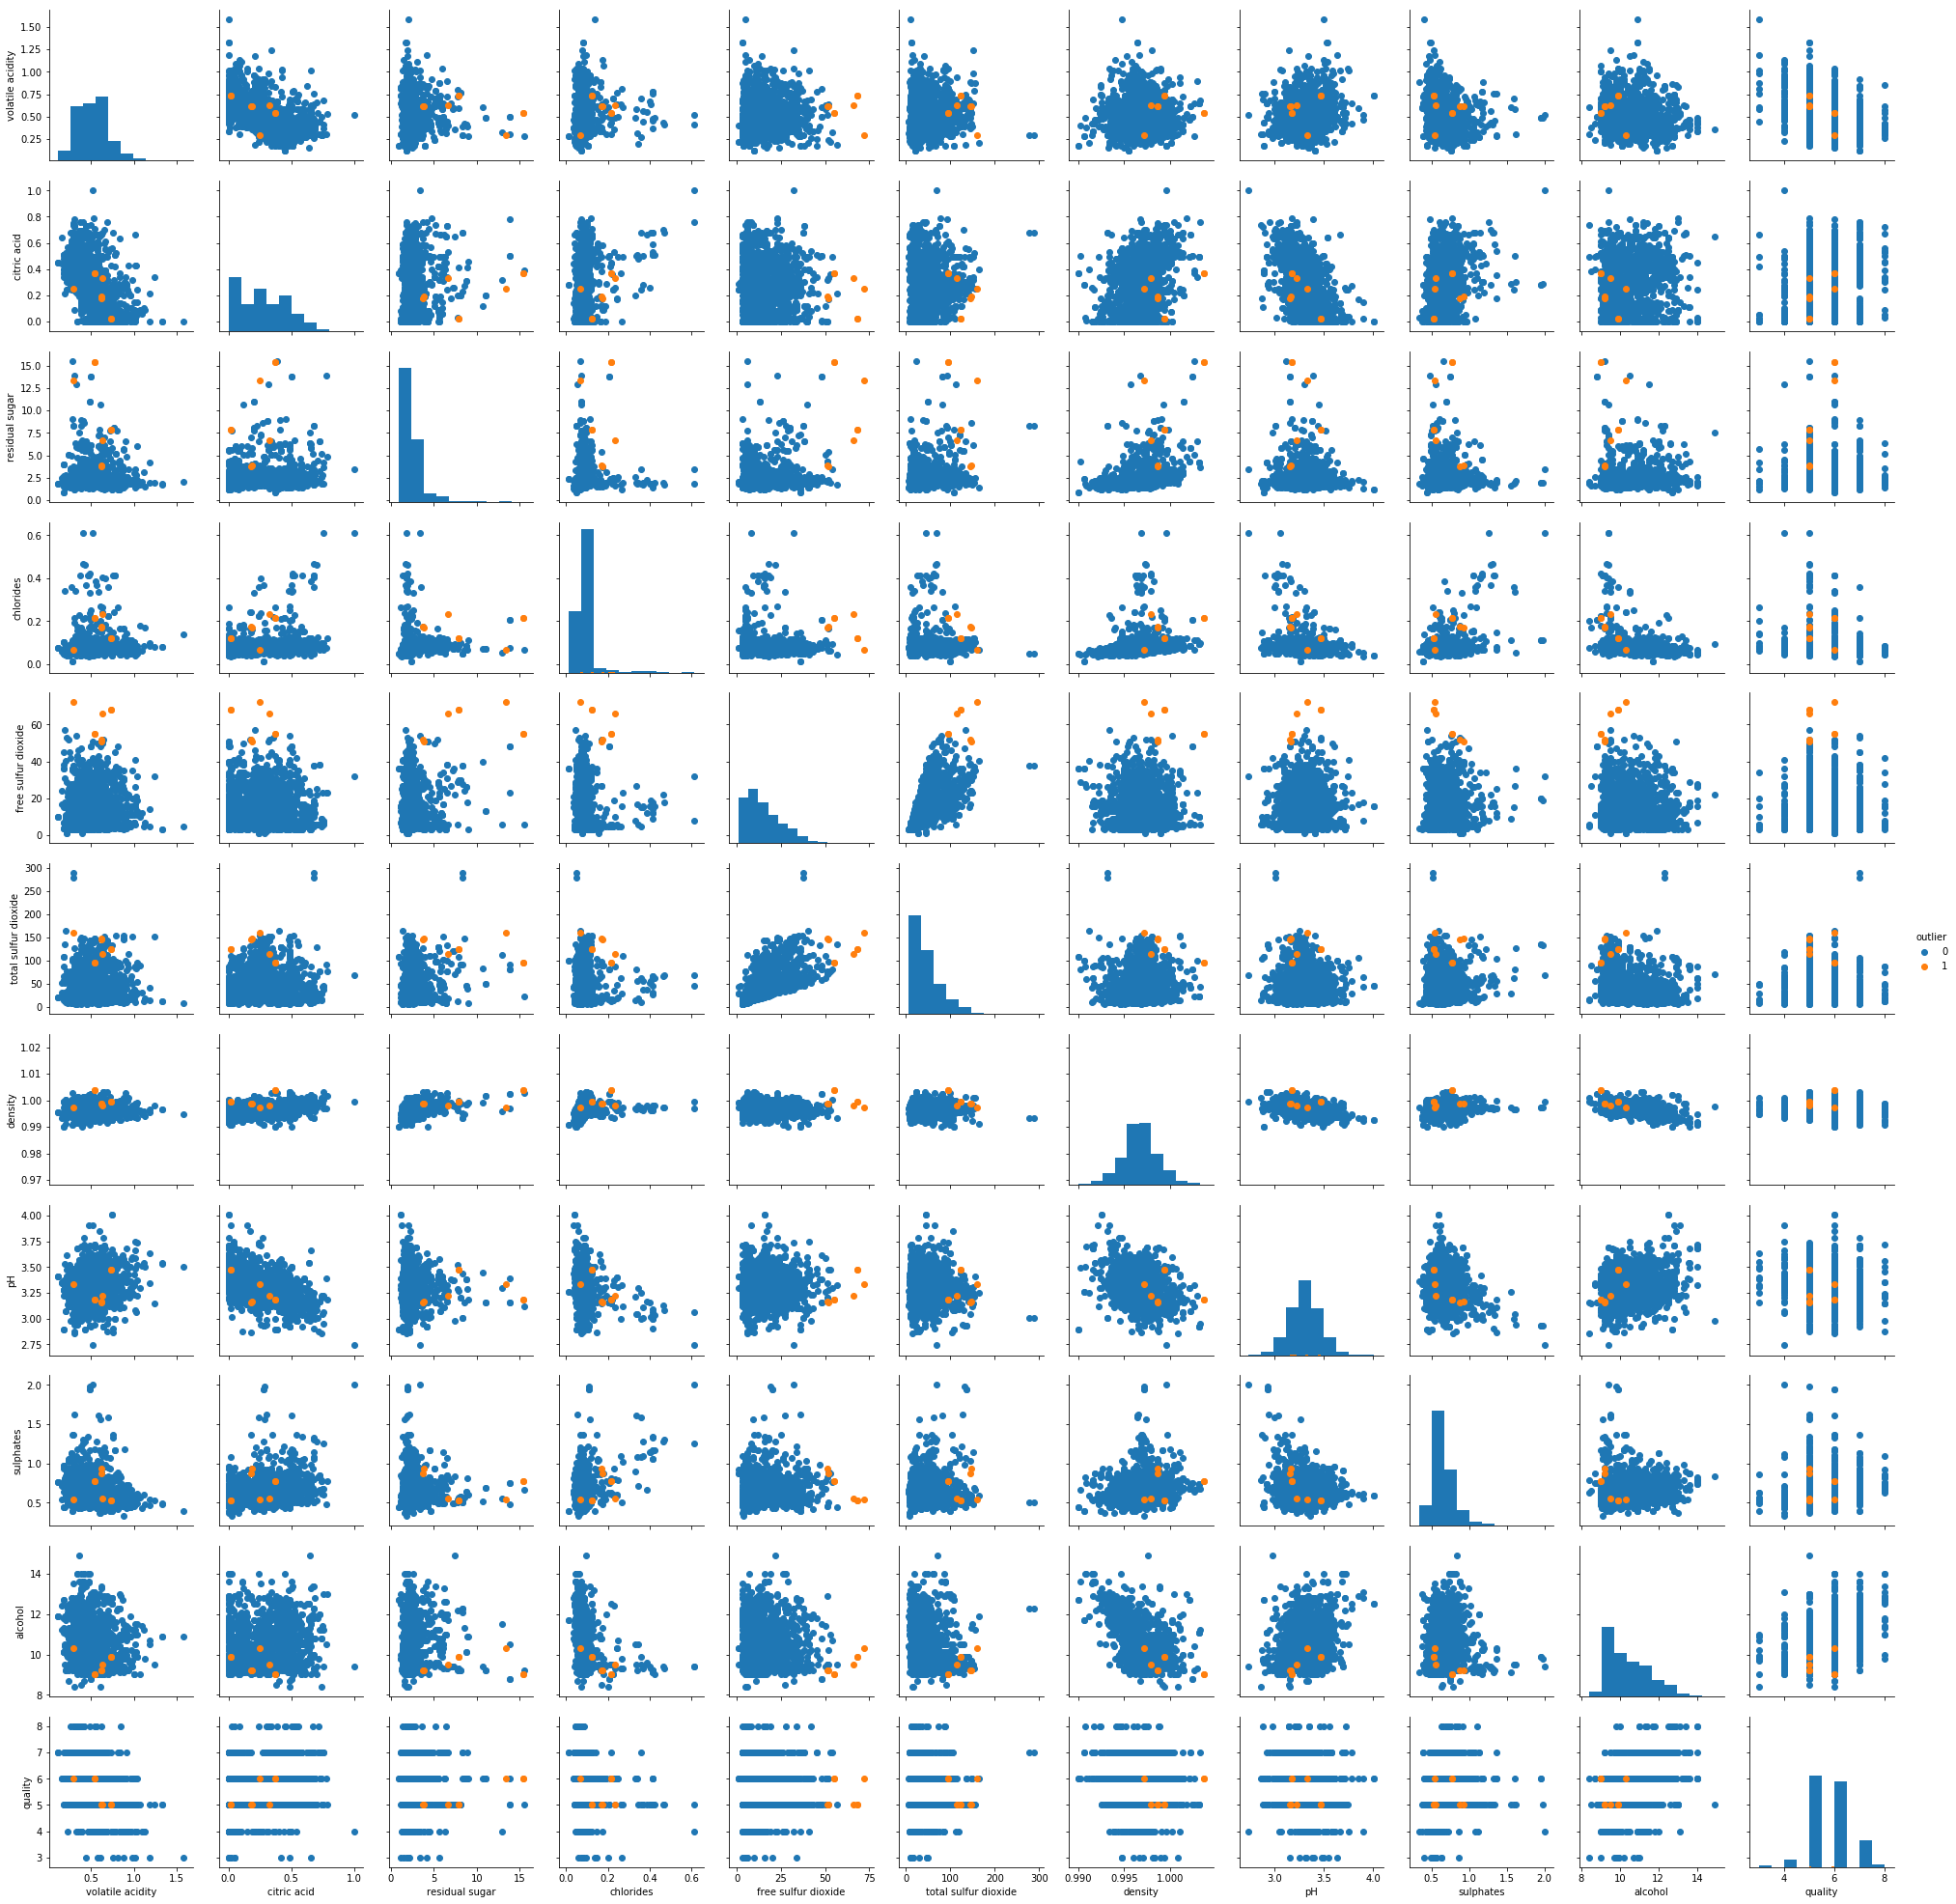

In [19]:
# visualize the outlier in pair plot
ax = sns.PairGrid(redoutlier, vars = red.iloc[:,1:13], hue='outlier')
ax = ax.map_diag(plt.hist) 
ax = ax.map_offdiag(plt.scatter)
ax = ax.add_legend()

There are two obvious outliers in 'total sulfur dioxide'. It did not show up in the list because of the way we defined the outliers in the statistical method - a data is considered to be an outlier only if it is an outlier in at least two feature dimensions. Those two are only outliers in 1 dimension. 

In [20]:
# redefine the outlier using single dimension 
def outliers(df, variables, n,a):
    outlier_indices = []
    for col in variables:
        upper = np.percentile(df[col], 75)
        lower = np.percentile(df[col], 25)
        IQR = upper - lower
        
        # Define outliers are outside of 1.5 IQR
        outliers_temp = (df[(df[col] < lower - IQR * a)|(df[col] > upper + IQR * a)] ).index
        outlier_indices.extend(outliers_temp)
        
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return(multiple_outliers)   
# get the outliers in 'total sulfur dioxide'
col_list2 = ['total sulfur dioxide']
Outliers_to_drop = outliers(red, col_list2, 0,3)
print(Outliers_to_drop)

[1079, 1081]


In [21]:
# concat them together
outlier_list  = list(outlier_list)+Outliers_to_drop
print(outlier_list)

[396, 14, 15, 400, 1558, 1434, 1435, 1244, 1079, 1081]


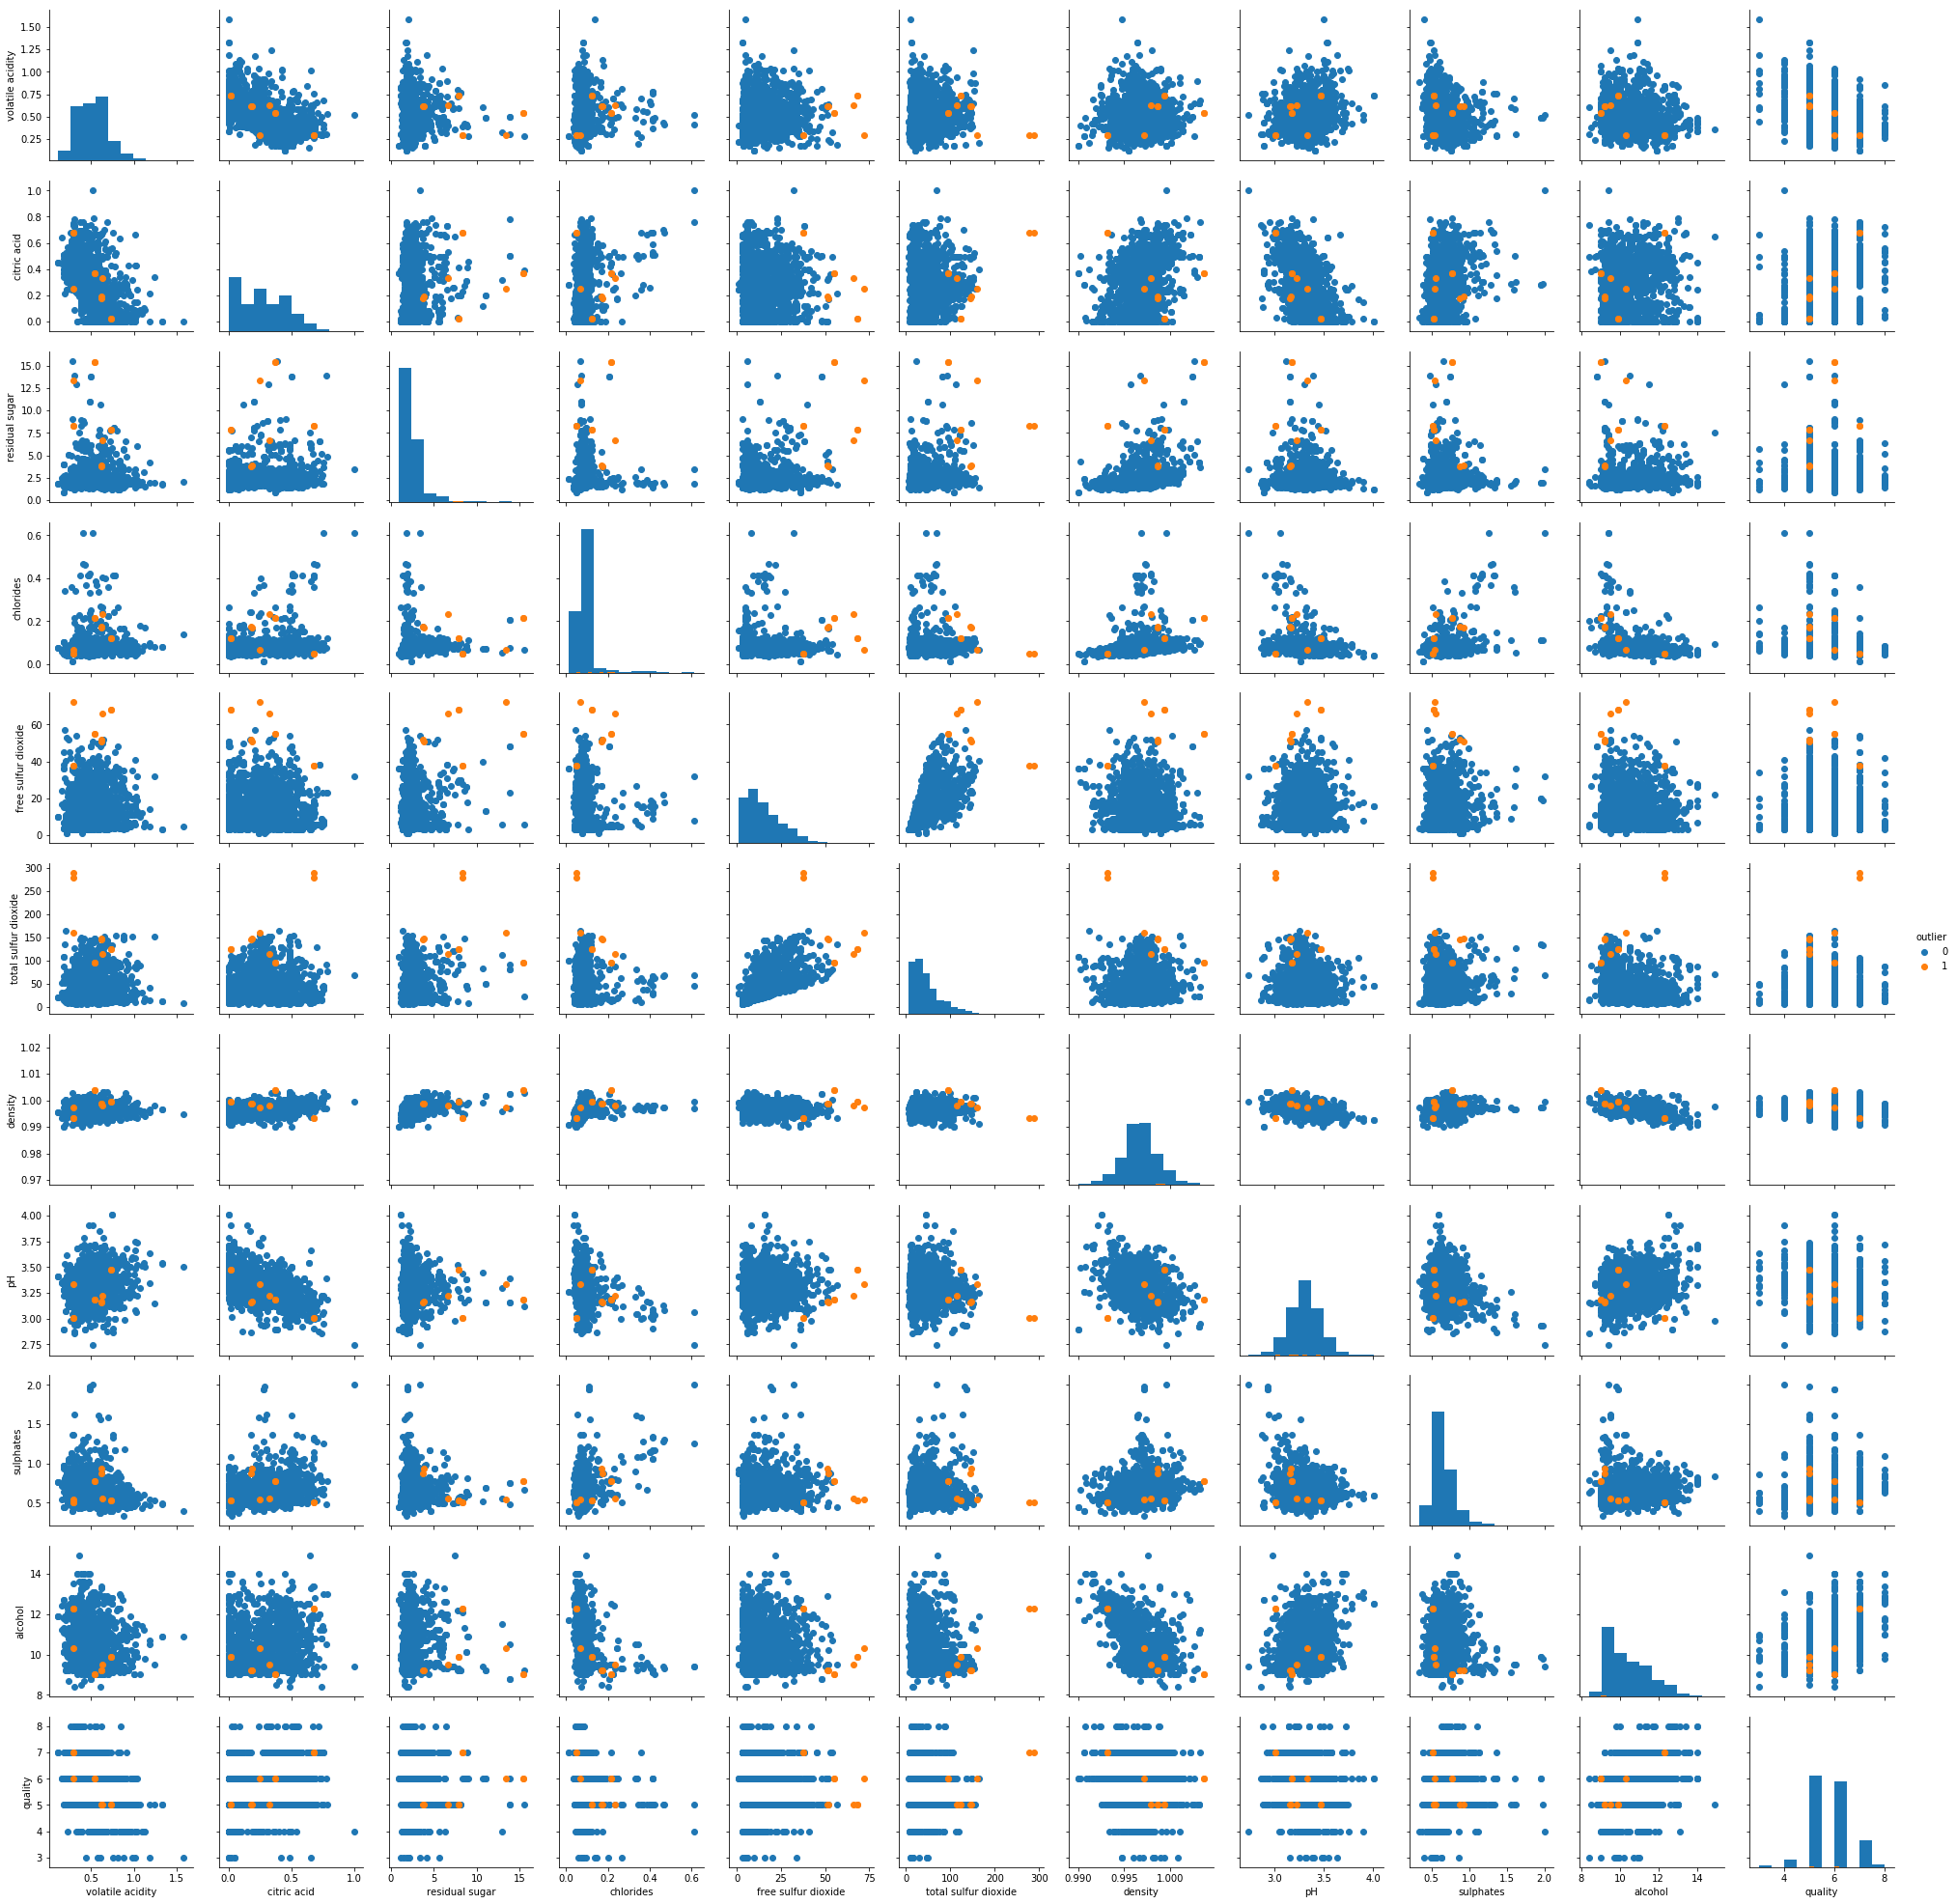

In [22]:
# visualize the 10 outliers in pair plot
for i in outlier_list:
    redoutlier.iloc[i,12]=1
ax = sns.PairGrid(redoutlier, vars = red.iloc[:,1:13], hue='outlier')
ax = ax.map_diag(plt.hist) 
ax = ax.map_offdiag(plt.scatter)
ax = ax.add_legend()

In [23]:
# drop the identified outliers
red = red.drop(outlier_list,axis=0)
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,8.321649,0.527801,0.270736,2.497514,0.087123,15.621145,45.770296,0.996736,3.311687,0.658181,10.425267,5.635620
std,1.742619,0.179142,0.194608,1.274764,0.046716,9.946660,31.359425,0.001869,0.154224,0.169579,1.064440,0.807718
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,13.000000,38.000000,0.996740,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997800,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,57.000000,165.000000,1.003200,4.010000,2.000000,14.900000,8.000000


We removed 10 observations in total, which we believe is a acceptable proportion of the dataset. Since our dataset is clean, we can move to the clusting and model fitting. 

## Kmeans Clustering

ignore the quality column for now. We want to see how does the data cluser using onlyt the 11 features. 

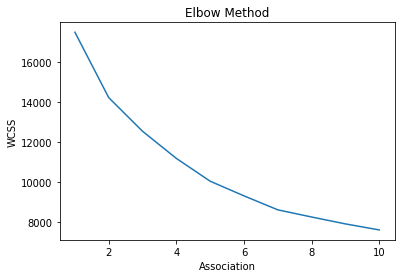

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# standardize the data
scaler=StandardScaler()
X_standardized=scaler.fit_transform(red.iloc[:,0:11])
y=red['quality']

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 400, n_init = 10, random_state = 0)
    kmeans.fit(X_standardized)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Association')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [25]:
# elbow point is about 7
kmeans = KMeans(n_clusters = 7, init = 'k-means++', max_iter = 500, 
                n_init = 10, random_state = 0)
labels = kmeans.fit_predict(X_standardized)

df=pd.DataFrame({'labels':labels, 'quality':y})
# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['quality'])
# Display ct
print(ct)

quality  3   4    5    6   7  8
labels                         
0        2   4   83  122  49  5
1        1   6  221  101  10  0
2        0   1   17    9   1  0
3        0  10   35  104  25  4
4        0   1   30   10   5  0
5        7  29  264  164  20  0
6        0   2   26  125  87  9


In [26]:
# using 6 clusters (same as the number of quality classes showing in the dataset)
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 500, 
                n_init = 10, random_state = 0)
labels = kmeans.fit_predict(X_standardized)

df=pd.DataFrame({'labels':labels, 'quality':y})
# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['quality'])
# Display ct
print(ct)

quality  3   4    5    6   7  8
labels                         
0        0  10   39  108  25  4
1        0   1   19    9   1  0
2        1   7  239  101   9  0
3        2   4   83  126  53  5
4        0   2   26  124  89  9
5        7  29  270  167  20  0


As the crosstab shows, kmeans method does not predict the quality well. Let's check the mean value of different features within the clustered group (not the quality group!). 

In [27]:
red['clusters']=labels
red_grouped = red.groupby('clusters').mean()
print(red_grouped)

          fixed acidity  volatile acidity  citric acid  residual sugar  \
clusters                                                                 
0              6.358065          0.607634     0.085914        2.196237   
1              8.433333          0.529667     0.486000        1.963333   
2              8.111204          0.546989     0.277759        2.900000   
3             11.163370          0.419469     0.509377        2.938462   
4              8.408400          0.342420     0.409200        2.278000   
5              7.590467          0.637667     0.119919        2.219371   

          chlorides  free sulfur dioxide  total sulfur dioxide   density  \
clusters                                                                   
0          0.067452            19.569892             42.709677  0.994213   
1          0.347333            14.966667             62.933333  0.997087   
2          0.085846            26.222689             87.369748  0.997310   
3          0.088560        

The predicted labels do not represent the quality well, but can be used for recommendation. 
for example, cluster 5 has the highest fixed acidity, cluster 1 has the lowest citric acid. If a customer enjoys a bottle of wine in cluser 5, we can recommend other wines in the same cluster to him. 

In [28]:
red[red['clusters']==5].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clusters
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,5
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,5


In [29]:
# don't need the cluster for the following analysis
red=red.drop(columns=['clusters'])

# TSNE

Visualize the dataset using TSNE

In [30]:
def scatter_2d_label(X_2d, y, s=2, alpha=0.5, lw=2):
    """Visualuse a 2D embedding with corresponding labels.
    
    X_2d : ndarray, shape (n_samples,2)
        Low-dimensional feature representation.
    
    y : ndarray, shape (n_samples,)
        Labels corresponding to the entries in X_2d.
        
    s : float
        Marker size for scatter plot.
    
    alpha : float
        Transparency for scatter plot.
        
    lw : float
        Linewidth for scatter plot.
    """
    targets = np.unique(y)
    colors = sns.color_palette(n_colors=targets.size)
    for color, target in zip(colors, targets):
        plt.scatter(X_2d[y == target, 0], X_2d[y == target, 1], color=color, label=target, s=s, alpha=alpha, lw=lw)

In [31]:
#from scatter_2d_label import scatter_2d_label
from sklearn.manifold import TSNE

tSne = TSNE(n_components=2, perplexity=5, random_state=0)
X_tsne1 = tSne.fit_transform(X_standardized)

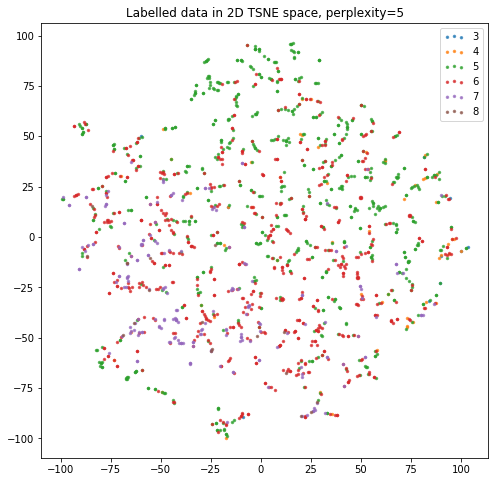

In [32]:
plt.figure(figsize=(8,8))
scatter_2d_label(X_tsne1, red['quality'], alpha=0.75)
plt.title('Labelled data in 2D TSNE space, perplexity=5')
plt.legend(loc='best', scatterpoints=3)
plt.show()

Different quality classes do not seem to cluster. the majority of class 5 are in the upper half of the plot, while the majority of class 7 are in the lower half. 

However, class 6 is everywhere... This also explains why we could not get good result from the Kmeans clustering.

In [33]:
# increase the perplexity to 30
tSne = TSNE(n_components=2, perplexity=30, random_state=0)
X_tsne2 = tSne.fit_transform(X_standardized)

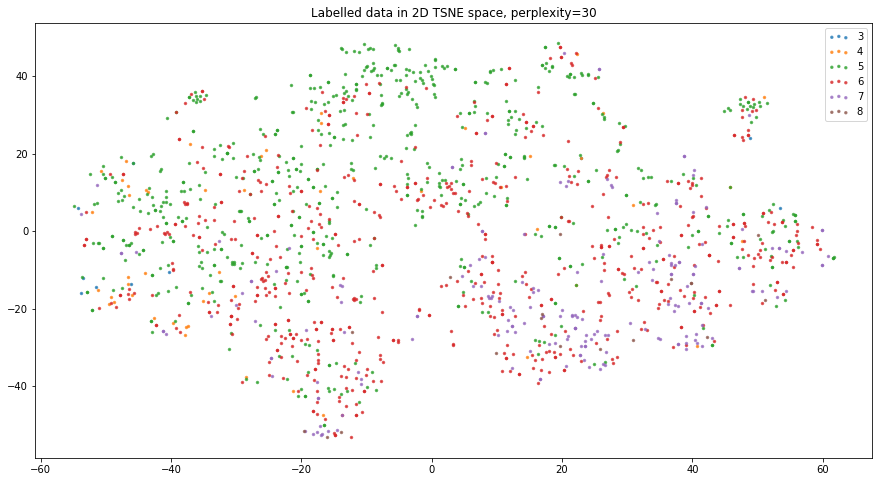

In [34]:
plt.figure(figsize=(15,8))
scatter_2d_label(X_tsne2, red['quality'], alpha=0.75)
plt.title('Labelled data in 2D TSNE space, perplexity=30')
plt.legend(loc='best', scatterpoints=3)
plt.show()

In [35]:
# further increase the perplexity to 100
tSne = TSNE(n_components=3, perplexity=100, random_state=0)
X_tsne3 = tSne.fit_transform(X_standardized)

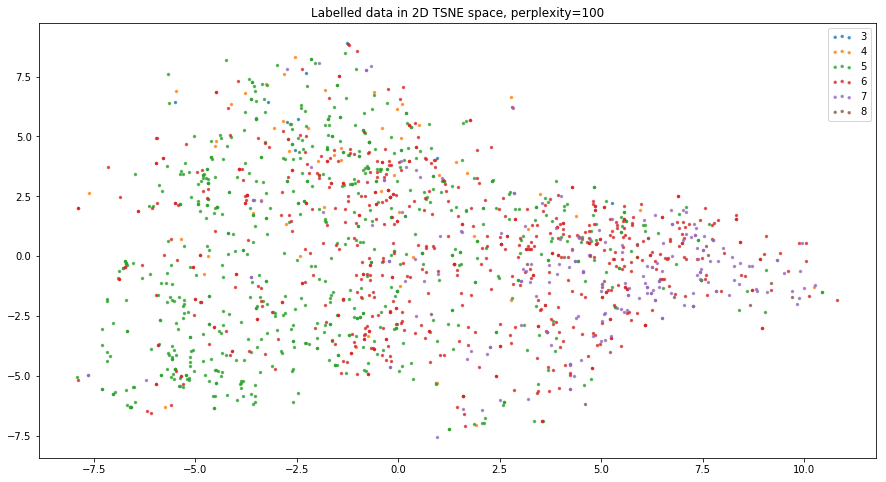

In [36]:
plt.figure(figsize=(15,8))
scatter_2d_label(X_tsne3, red['quality'], alpha=0.75)
plt.title('Labelled data in 2D TSNE space, perplexity=100')
plt.legend(loc='best', scatterpoints=3)
plt.show()

Treating this as a classification task will be challenging because even after PCA which we attempt next step we find that the classes are quite mixed and they do not form any apparent classes. We are going to continue building our classifier:

## The original data with 6 quality classes

We try to fit classification models using the standardized data (11 features), on 6 quality classes (3-8)

In [37]:
# import the class
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
#! pip install xgboost
from xgboost import XGBClassifier 
from sklearn.model_selection import cross_val_score

In [38]:
#define models and function.
def run_model(X_train,y_train):
    # logistic regression 
    log_model = LogisticRegression()
    C = 1.0  # SVM regularization parameter
    svc = svm.SVC(kernel='linear', C=C)
    # LinearSVC (linear kernel)
    lin_svc = svm.LinearSVC(C=C)
    #SVC with RBF kernel
    rbf_svc = svm.SVC(kernel='rbf', C=C)
    # SVC with polynomial (degree 3) kernel
    poly_svc = svm.SVC(kernel='poly', C=C)
    # decision tree
    dt = DecisionTreeClassifier(random_state=0)
    # random forest 
    rf = RandomForestClassifier(random_state=0)
    # naive bayes
    nb = GaussianNB()
    # perceptron 
    per = Perceptron()
    # knn 
    knn=KNeighborsClassifier(n_neighbors=7) # log(1599) is about 7
    # bagging classifier
    bc = BaggingClassifier(base_estimator=dt, random_state=0)
    # Import AdaBoostClassifier
    ada = AdaBoostClassifier(base_estimator=dt, random_state=0)
    # xg 
    xg=XGBClassifier()

    models = [log_model, svc, lin_svc, rbf_svc, poly_svc, dt, rf, nb, per, knn, bc, ada,xg]
    names = ['Logistic Regression', 'SVC(linear kernal)', 'Linear SVC','SVC(RBF)','SVC(polynomial)','Decision Tree',
            'Random Forest', 'Naive Bayes', 'Perceptron', 'KNN' , 'Bagging Classifier', 'Ada Boosting','XG Boosting']

    acc_mean=[]
    acc_high=[]
    acc_low=[]
    acc_std=[]
    f1_mean=[]
    f1_high=[]
    f1_low=[]
    f1_std=[]


    for model in models:
       # scores = cross_val_score(model, X_transformed, red['tier'], scoring='accuracy', cv=5,random=)
        acc_scores = cross_val_score(model, X_train, y_train, scoring='accuracy',cv=5)
        f1_scores = cross_val_score(model, X_train, y_train, scoring='f1_weighted',cv=5)
        acc_mean.append(acc_scores.mean())
        acc_high.append(acc_scores.max())
        acc_low.append(acc_scores.min())
        acc_std.append(acc_scores.std())
        f1_mean.append(f1_scores.mean())
        f1_high.append(f1_scores.max())
        f1_low.append(f1_scores.min())
        f1_std.append(f1_scores.std())

    cv_df=pd.DataFrame({'models':names, 'acc_mean':acc_mean,'acc_high':acc_high,'acc_low':acc_low,'acc_std':acc_std,
                       'f1_mean':f1_mean,'f1_high':f1_high,'f1_low':f1_low,'f1_std':f1_std})
    return(cv_df.round(3).sort_values(by='acc_mean', ascending=False))
    

In [39]:
# split the data 
X_train,X_test,y_train,y_test=train_test_split(X_standardized,red['quality'],test_size=0.2,random_state=0,stratify=y)
# fit the models and print the accuracy and f1 scores
run_model(X_train,y_train)

,models,acc_mean,acc_high,acc_low,acc_std,f1_mean,f1_high,f1_low,f1_std
6,Random Forest,0.639,0.675,0.608,0.027,0.620,0.660,0.590,0.028
12,XG Boosting,0.632,0.664,0.614,0.018,0.616,0.644,0.596,0.016
10,Bagging Classifier,0.630,0.663,0.591,0.026,0.612,0.647,0.575,0.028
3,SVC(RBF),0.609,0.643,0.588,0.021,0.583,0.621,0.563,0.024
4,SVC(polynomial),0.593,0.629,0.570,0.023,0.569,0.603,0.544,0.024
0,Logistic Regression,0.588,0.635,0.554,0.029,0.552,0.603,0.514,0.030
11,Ada Boosting,0.583,0.606,0.560,0.018,0.582,0.607,0.555,0.022
2,Linear SVC,0.581,0.631,0.558,0.027,0.535,0.587,0.512,0.027
5,Decision Tree,0.576,0.605,0.541,0.021,0.574,0.601,0.536,0.022
1,SVC(linear kernal),0.575,0.635,0.534,0.033,0.525,0.578,0.482,0.031


The best model, Random Forest, only give accuracy 0.639. 

The reason may be that the data set is imbalanced, and there are very few data points in class 3,4 and 8, so training models on them would be challenging. Thus, we'll devide the 6 classes into tiers, so the sample size in each tier would be more balanced. 

## break it into 3 tiers

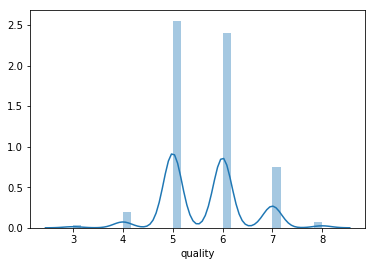

In [40]:
sns.distplot(red['quality'])

The majority of the wines are in quality class 5 and 6. we consider 6 as the middle class (2) by itself, and the ones below 6 to be the lower class (1), and the ones above to be the upper class (3). 

In [41]:
# break the train data into 3 tiers
tiers = []
for i in y_train:
    if i >= 1 and i <= 5:
        tiers.append('1')
    elif i ==6:
        tiers.append('2')
    elif i >= 7 and i <= 10:
        tiers.append('3')

In [42]:
# fit the models and print results
run_model(X_train,tiers)

,models,acc_mean,acc_high,acc_low,acc_std,f1_mean,f1_high,f1_low,f1_std
6,Random Forest,0.681,0.710,0.652,0.020,0.677,0.704,0.650,0.019
12,XG Boosting,0.674,0.715,0.645,0.027,0.669,0.713,0.641,0.029
10,Bagging Classifier,0.666,0.684,0.646,0.016,0.661,0.680,0.641,0.016
11,Ada Boosting,0.644,0.668,0.621,0.017,0.644,0.669,0.621,0.017
3,SVC(RBF),0.640,0.668,0.617,0.021,0.630,0.663,0.604,0.024
5,Decision Tree,0.631,0.643,0.617,0.010,0.632,0.643,0.617,0.010
4,SVC(polynomial),0.622,0.659,0.597,0.021,0.607,0.647,0.577,0.024
0,Logistic Regression,0.617,0.676,0.581,0.032,0.601,0.659,0.560,0.033
1,SVC(linear kernal),0.616,0.672,0.569,0.034,0.604,0.651,0.557,0.031
2,Linear SVC,0.608,0.652,0.569,0.031,0.581,0.629,0.538,0.037


Random forest seems to be the best model here, with the slightly improvement of accuracy, from 0.639 to 0.681

## Parameter tuning 

In [43]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=0)

parameters = {'criterion':['gini','entropy'],
              'n_estimators':list(range(60,80,10)),
              'min_samples_split':list(range(2,5)),
              'min_samples_leaf':list(range(1,5))}
searcher = GridSearchCV(rf, parameters,cv=5)
searcher.fit(X_train, tiers)

# Report the best parameters
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

Best CV params {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 70}
Best CV accuracy 0.7167584579071598


We tried parameter tuning on the Random Forest and on the 3 tiers sample and see a slightly improvement in the accuracy. We will use this results later on the test set.

## 2 classes models - good vs bad

Instead of 3 tiers, we break the quality classes into simply good (1) and bad (0). 
If a bottle of wine has a quality score higher than 5, we consider it a good bottle. 

In [44]:
# break y_train into 2 classes
#two_class=(tiers>=6)*1
two_class = []
for i in y_train:
    if i >= 6:
        two_class.append('1')
    else:
        two_class.append('0')

In [45]:
# run models and print the results
run_model(X_train,two_class)

,models,acc_mean,acc_high,acc_low,acc_std,f1_mean,f1_high,f1_low,f1_std
10,Bagging Classifier,0.780,0.823,0.748,0.029,0.780,0.823,0.748,0.029
6,Random Forest,0.773,0.823,0.740,0.031,0.773,0.823,0.740,0.031
12,XG Boosting,0.758,0.791,0.728,0.022,0.758,0.791,0.729,0.022
3,SVC(RBF),0.745,0.780,0.713,0.022,0.745,0.779,0.713,0.022
2,Linear SVC,0.743,0.807,0.701,0.035,0.745,0.811,0.701,0.036
0,Logistic Regression,0.741,0.811,0.697,0.038,0.741,0.811,0.697,0.038
1,SVC(linear kernal),0.740,0.815,0.685,0.042,0.741,0.815,0.685,0.042
4,SVC(polynomial),0.733,0.768,0.705,0.021,0.733,0.767,0.705,0.021
7,Naive Bayes,0.727,0.772,0.693,0.025,0.726,0.769,0.693,0.025
5,Decision Tree,0.721,0.740,0.698,0.016,0.720,0.738,0.698,0.015


Now, we get a much high accuracy scores with Bagging(0.78). It seems that 2 class set gives good performance so we tried to fit a votingclassifier model with the top 3 models to further improve the learning. 

In [46]:
from sklearn.ensemble import VotingClassifier

dt = DecisionTreeClassifier(random_state=0)
bc = BaggingClassifier(base_estimator=dt, random_state=0)
rf = RandomForestClassifier(random_state=0)
xg=XGBClassifier()

classifiers = [('Bagging Classifier', bc),
('XG Boosting', xg),
('Random Forest',rf)]
vc = VotingClassifier(estimators=classifiers)

models = [bc,xg,rf,vc]
names = ['Bagging Classifier','XG Boosting','Random Forest','Voting Classifier']

acc_mean=[]
acc_high=[]
acc_low=[]
acc_std=[]
f1_mean=[]
f1_high=[]
f1_low=[]
f1_std=[]

for model in models:
       # scores = cross_val_score(model, X_transformed, red['tier'], scoring='accuracy', cv=5,random=)
        acc_scores = cross_val_score(model, X_train, two_class, scoring='accuracy',cv=5)
        f1_scores = cross_val_score(model, X_train, two_class, scoring='f1_weighted',cv=5)
        acc_mean.append(acc_scores.mean())
        acc_high.append(acc_scores.max())
        acc_low.append(acc_scores.min())
        acc_std.append(acc_scores.std())
        f1_mean.append(f1_scores.mean())
        f1_high.append(f1_scores.max())
        f1_low.append(f1_scores.min())
        f1_std.append(f1_scores.std())

# compile the results for the 4 models together for comparison 
cv_df=pd.DataFrame({'models':names, 'acc_mean':acc_mean,'acc_high':acc_high,'acc_low':acc_low,'acc_std':acc_std,
                   'f1_mean':f1_mean,'f1_high':f1_high,'f1_low':f1_low,'f1_std':f1_std})
cv_df.round(3).sort_values(by='acc_mean', ascending=False)

,models,acc_mean,acc_high,acc_low,acc_std,f1_mean,f1_high,f1_low,f1_std
3,Voting Classifier,0.792,0.827,0.760,0.027,0.792,0.827,0.760,0.027
0,Bagging Classifier,0.780,0.823,0.748,0.029,0.780,0.823,0.748,0.029
2,Random Forest,0.773,0.823,0.740,0.031,0.773,0.823,0.740,0.031
1,XG Boosting,0.758,0.791,0.728,0.022,0.758,0.791,0.729,0.022


Though the increasment of accuracy is not huge, the Voting Classifier definitely gives the best result so far.

### PCA

Reduce the dimensions and see how it affects the results. 

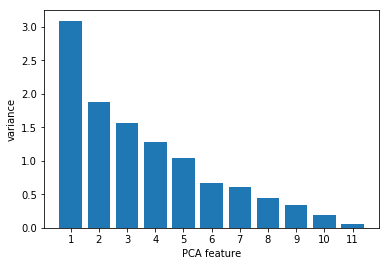

In [47]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

# Create scaler: scaler - standard works better here.
scaler = StandardScaler()
#scaler = Normalizer()

# Create PCA instance: model
pca = PCA()

# Create pipeline: pipeline
#pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
#pipeline.fit(X_train)
pca.fit(X_train)

# Plot the explained variances
features = range(1,pca.n_components_+1)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

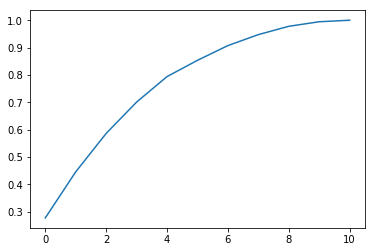

In [48]:
# plot the cumsum of explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [49]:
print(np.where(np.cumsum(pca.explained_variance_ratio_)>0.9))

(array([ 6,  7,  8,  9, 10]),)


7 features explains more than 90%, 9 expalins more than 95%. 

In [50]:
# fit the pca with 7 compnents on X_train
npc = 7
pca = PCA(n_components=npc, copy=True)
X_transformed = pca.fit_transform(X_train)

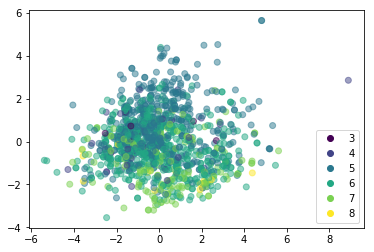

In [51]:
# visualize the data on the first 2 dimensions 
pca_df=pd.DataFrame(X_transformed)

labels = np.unique(y_train)
scatter = plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], c=y_train, label=y_train,alpha=0.5)

handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter.cmap(scatter.norm(yi))) for yi in labels]

plt.legend(handles, labels)

From the two dimention plot after PCA, we still see all the points from different quality classes gathered toghther and there is no obvious cluster for this dataset.

### Re-fit the models using pca transformed data

In [52]:
run_model(X_transformed,two_class)

,models,acc_mean,acc_high,acc_low,acc_std,f1_mean,f1_high,f1_low,f1_std
6,Random Forest,0.759,0.795,0.729,0.023,0.759,0.796,0.729,0.023
10,Bagging Classifier,0.755,0.776,0.729,0.016,0.755,0.776,0.729,0.017
12,XG Boosting,0.745,0.764,0.718,0.018,0.745,0.764,0.718,0.018
3,SVC(RBF),0.741,0.787,0.706,0.030,0.741,0.787,0.706,0.029
0,Logistic Regression,0.725,0.803,0.689,0.041,0.726,0.803,0.689,0.041
1,SVC(linear kernal),0.725,0.799,0.693,0.040,0.725,0.799,0.693,0.040
2,Linear SVC,0.721,0.795,0.681,0.042,0.722,0.795,0.681,0.042
7,Naive Bayes,0.721,0.740,0.702,0.014,0.718,0.739,0.699,0.014
4,SVC(polynomial),0.720,0.768,0.689,0.028,0.719,0.766,0.688,0.028
11,Ada Boosting,0.719,0.752,0.663,0.031,0.719,0.752,0.661,0.032


We see the accuracy score decreased a little. PCA does not help here. 

## Using the 2 most dominated features only

We are intrested to see the results using only the 2 most dominated features,'volatile acidity' and 'alcohol' from the feature exploration and heat map.

In [53]:
# split the data 
red['good?']=(red['quality']>=6)*1
X_train2,X_test2,y_train2,y_test2=train_test_split(red.iloc[:,0:11],red['good?'],test_size=0.2,random_state=0,stratify=y)
run_model(X_train2[['volatile acidity','alcohol']],y_train2)

,models,acc_mean,acc_high,acc_low,acc_std,f1_mean,f1_high,f1_low,f1_std
2,Linear SVC,0.730,0.799,0.697,0.036,0.728,0.799,0.697,0.036
12,XG Boosting,0.727,0.811,0.693,0.043,0.727,0.811,0.693,0.043
6,Random Forest,0.723,0.764,0.697,0.024,0.723,0.763,0.697,0.024
7,Naive Bayes,0.722,0.807,0.690,0.043,0.722,0.807,0.690,0.044
3,SVC(RBF),0.720,0.783,0.689,0.033,0.720,0.784,0.689,0.033
0,Logistic Regression,0.718,0.787,0.669,0.038,0.717,0.787,0.669,0.038
4,SVC(polynomial),0.712,0.795,0.677,0.043,0.711,0.795,0.676,0.043
1,SVC(linear kernal),0.711,0.787,0.681,0.039,0.711,0.788,0.681,0.039
10,Bagging Classifier,0.709,0.768,0.646,0.041,0.709,0.767,0.645,0.041
11,Ada Boosting,0.707,0.764,0.671,0.037,0.706,0.763,0.671,0.037


The accuracy decreased as expected, but not by much. Therefore, when features are not very correlated with the quallity, it does not contribute much to the model.  

We realized that our model does not work well mainly becasue of two reasons: imbalanced dataset and indistinct cluster. We tried to solve the imbalanced data issue using the techniques we learned from the class.

## Oversampling the minority class

The 6-class models do not fit well because there are too few data points in the minority classes. We try to solve the problem by oversampling. 

### KDE

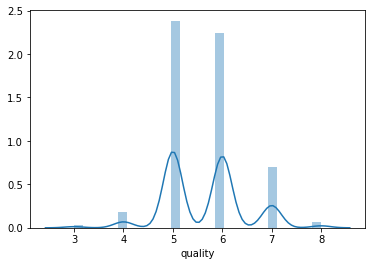

In [54]:
sns.distplot(y_train)

In [55]:
dt = y_train
bw = 1.06 * dt.std() * len(dt) ** (-1 / 5.)
from sklearn.neighbors import KernelDensity

# Gaussian KDE with Seaborn bandwidth
kde = KernelDensity(kernel='gaussian', bandwidth=bw)

# Grab the data, and compute the support (sampling points)
x = y_train

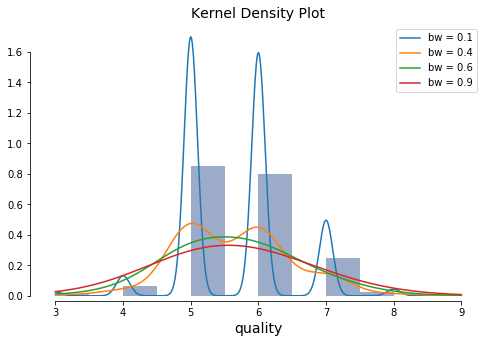

In [56]:
# Compare the impact of bandwidth selection on a KDE
# Make plots
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(x, bins=10, alpha=0.5, color=sns.xkcd_rgb["denim blue"], normed=True, label='')
support = np.linspace(3, 9, len(x))

# Gaussian KDE with varying bandwidths
for bw in np.linspace(0.1, 0.9, 4):
    kde = KernelDensity(kernel='gaussian', bandwidth=bw)
    kde.fit(x[:, np.newaxis])
    y = kde.score_samples(support[:, np.newaxis])
    ax.plot(support, np.exp(y), label='bw = {0:3.1f}'.format(bw))

# Decorate plot
plt.xlabel('quality', fontsize=14)
plt.title('Kernel Density Plot', fontsize=14)
plt.legend()

sns.despine(offset=5, trim=True)
plt.show()

In [57]:
ncps = 20
bw = 0.6 # Could do grid search to determine
nimgs = 3200 

kde = KernelDensity(bandwidth=0.6)
df_KDE = X_train2.copy()
df_KDE['quality'] = y_train
kde.fit(df_KDE)

# Sample from model, and recover full image
new_data = kde.sample(nimgs, random_state=42)
print(new_data.shape)

(3200, 12)


In [58]:
new_data  = pd.DataFrame(new_data)
new_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.305127,2.401155,0.300489,3.811882,0.635081,26.289613,108.252057,1.360520,4.483926,-0.168533,9.684179,4.444171
1,7.733308,0.083788,-0.150420,2.222946,0.665490,16.551073,32.252570,1.030320,3.154252,-0.065103,10.669790,6.814910
2,8.856030,0.849776,-0.746571,4.061136,0.698830,7.253066,28.048410,-0.130555,4.502579,0.733769,8.479024,4.320777
3,6.418551,0.572025,0.426693,3.754562,-0.535338,17.051412,118.444745,1.149980,2.722792,0.325139,8.702511,5.390682
4,8.415071,0.039228,0.422943,0.930845,-0.117806,6.969877,21.572476,0.326920,4.158506,1.298115,11.268382,6.055172


In [59]:
new_data.columns = list(red.columns)[0:12]
new_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.305127,2.401155,0.300489,3.811882,0.635081,26.289613,108.252057,1.360520,4.483926,-0.168533,9.684179,4.444171
1,7.733308,0.083788,-0.150420,2.222946,0.665490,16.551073,32.252570,1.030320,3.154252,-0.065103,10.669790,6.814910
2,8.856030,0.849776,-0.746571,4.061136,0.698830,7.253066,28.048410,-0.130555,4.502579,0.733769,8.479024,4.320777
3,6.418551,0.572025,0.426693,3.754562,-0.535338,17.051412,118.444745,1.149980,2.722792,0.325139,8.702511,5.390682
4,8.415071,0.039228,0.422943,0.930845,-0.117806,6.969877,21.572476,0.326920,4.158506,1.298115,11.268382,6.055172


In [60]:
KDE_data = df_KDE.append(new_data)
KDE_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
610,8.8,0.24,0.54,2.5,0.083,25.0,57.0,0.99830,3.39,0.54,9.2,5.0
322,7.8,0.62,0.05,2.3,0.079,6.0,18.0,0.99735,3.29,0.63,9.3,5.0
160,7.6,0.95,0.03,2.0,0.090,7.0,20.0,0.99590,3.20,0.56,9.6,5.0
783,6.5,0.46,0.14,2.4,0.114,9.0,37.0,0.99732,3.66,0.65,9.8,5.0
624,6.8,0.69,0.00,5.6,0.124,21.0,58.0,0.99970,3.46,0.72,10.2,5.0


In [61]:
KDE_data['quality']= np.round(KDE_data['quality'])
KDE_data['quality'] = KDE_data['quality'].astype('int')
KDE_data['quality'].unique()

array([5, 7, 6, 8, 4, 3, 9, 2])

In [62]:
KDE_data['quality'] = KDE_data['quality'].apply(lambda x: 3 if x ==2 else x)
KDE_data['quality'] = KDE_data['quality'].apply(lambda x: 8 if x ==9 else x)
KDE_data['quality'].unique()

array([5, 7, 6, 8, 4, 3])

In [63]:
#define models and function.
def run_model2(X_train,y_train):
    # logistic regression 
    log_model = LogisticRegression()
    C = 1.0  # SVM regularization parameter
    svc = svm.SVC(kernel='linear', C=C)
    # LinearSVC (linear kernel)
    lin_svc = svm.LinearSVC(C=C)
    #SVC with RBF kernel
    rbf_svc = svm.SVC(kernel='rbf', C=C)
    # SVC with polynomial (degree 3) kernel
    poly_svc = svm.SVC(kernel='poly', C=C)
    # decision tree
    dt = DecisionTreeClassifier(random_state=0)
    # random forest 
    rf = RandomForestClassifier(random_state=0)
    # naive bayes
    nb = GaussianNB()
    # perceptron 
    per = Perceptron()
    # knn 
    knn=KNeighborsClassifier(n_neighbors=7) # log(1599) is about 7
    # bagging classifier
    bc = BaggingClassifier(base_estimator=dt, random_state=0)
    # Import AdaBoostClassifier
    ada = AdaBoostClassifier(base_estimator=dt, random_state=0)
    # xg 
    xg=XGBClassifier()

    
    #  svc, lin_svc, rbf_svc, poly_svc, dt, , nb, per, knn, bc, ada,xg
    
    models = [log_model, dt, bc, xg, rbf_svc, rf, knn, ada]
    
    
    #'Logistic Regression', 'SVC(linear kernal)', 'Linear SVC',,'SVC(polynomial)'
    #,'Decision Tree', , 'Naive Bayes', 'Perceptron', 'KNN' , c, 'Ada Boosting',
    names = ['Logistic Regression', 'Decision Tree', 'Bagging Classifier', 'XG Boosting', 'SVC(RBF)',
            'Random Forest','KNN' ,  'Ada Boosting', ]

    acc_mean=[]
    acc_high=[]
    acc_low=[]
    acc_std=[]
    f1_mean=[]
    f1_high=[]
    f1_low=[]
    f1_std=[]


    for model in models:
       # scores = cross_val_score(model, X_transformed, red['tier'], scoring='accuracy', cv=5,random=)
        acc_scores = cross_val_score(model, X_train, y_train, scoring='accuracy',cv=5)
        f1_scores = cross_val_score(model, X_train, y_train, scoring='f1_weighted',cv=5)
        acc_mean.append(acc_scores.mean())
        acc_high.append(acc_scores.max())
        acc_low.append(acc_scores.min())
        acc_std.append(acc_scores.std())
        f1_mean.append(f1_scores.mean())
        f1_high.append(f1_scores.max())
        f1_low.append(f1_scores.min())
        f1_std.append(f1_scores.std())

        
    cv_df=pd.DataFrame({'models':names, 'acc_mean':acc_mean,'acc_high':acc_high,'acc_low':acc_low,'acc_std':acc_std,
                       'f1_mean':f1_mean,'f1_high':f1_high,'f1_low':f1_low,'f1_std':f1_std})
    return(cv_df.round(3).sort_values(by='acc_mean', ascending=False))

In [64]:
run_model2(KDE_data.iloc[:,0:11],KDE_data['quality'])

,models,acc_mean,acc_high,acc_low,acc_std,f1_mean,f1_high,f1_low,f1_std
4,SVC(RBF),0.516,0.601,0.479,0.044,0.479,0.567,0.445,0.045
6,KNN,0.490,0.560,0.460,0.036,0.466,0.542,0.438,0.039
3,XG Boosting,0.438,0.508,0.381,0.048,0.391,0.428,0.347,0.031
0,Logistic Regression,0.436,0.488,0.392,0.034,0.372,0.407,0.338,0.025
5,Random Forest,0.417,0.532,0.345,0.073,0.387,0.473,0.331,0.057
2,Bagging Classifier,0.404,0.521,0.323,0.073,0.378,0.462,0.309,0.056
1,Decision Tree,0.370,0.495,0.298,0.079,0.366,0.469,0.300,0.067
7,Ada Boosting,0.364,0.489,0.287,0.081,0.360,0.465,0.295,0.069


The accuracy decreased... Athough we generated more data points for the minority classes, we generated way more data points for the majority classes at the same time. KDE is not a good method here. 

### SMOTE

In [65]:
# Define a function to create a scatter plot of our data and labels
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np 

#y = red.iloc[:,11].values
#X = red.iloc[:, 0:11].values
y=y_train.values
X=X_train2.values

def plot_data(X, y):
	plt.scatter(X[y == 3, 0], X[y == 3, 1], label="Class #3", alpha=0.5, linewidth=0.15)
	plt.scatter(X[y == 4, 0], X[y == 4, 1], label="Class #4", alpha=0.5, linewidth=0.15)
	plt.scatter(X[y == 5, 0], X[y == 5, 1], label="Class #5", alpha=0.5, linewidth=0.15)
	plt.scatter(X[y == 6, 0], X[y == 6, 1], label="Class #6", alpha=0.5, linewidth=0.15)
	plt.scatter(X[y == 7, 0], X[y == 7, 1], label="Class #7", alpha=0.5, linewidth=0.15)
	plt.scatter(X[y == 8, 0], X[y == 8, 1], label="Class #8", alpha=0.5, linewidth=0.15)
	plt.legend()
	return plt.show()



In [66]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good?
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,8.321649,0.527801,0.270736,2.497514,0.087123,15.621145,45.770296,0.996736,3.311687,0.658181,10.425267,5.635620,0.534928
std,1.742619,0.179142,0.194608,1.274764,0.046716,9.946660,31.359425,0.001869,0.154224,0.169579,1.064440,0.807718,0.498936
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,13.000000,38.000000,0.996740,3.310000,0.620000,10.200000,6.000000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997800,3.400000,0.730000,11.100000,6.000000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,57.000000,165.000000,1.003200,4.010000,2.000000,14.900000,8.000000,1.000000


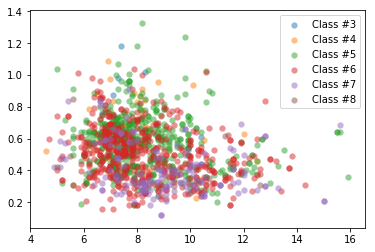

In [67]:
# Plot our data by running our plot data function on X and y
plot_data(X, y)

In [68]:
#! pip install imblearn
from imblearn.over_sampling import SMOTE

#https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html

# Define the resampling method
method = SMOTE(kind='regular')

# Create the resampled feature set
X_resampled, y_resampled = method.fit_sample(X, y)

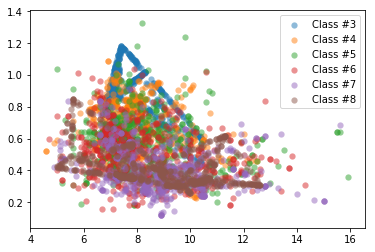

In [69]:
# Plot our data by running our plot data function on X and y
plot_data(X_resampled, y_resampled)

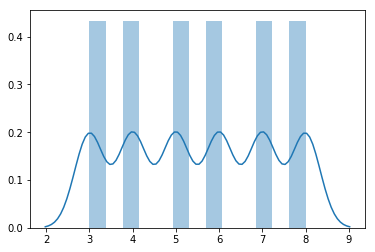

In [70]:
sns.distplot(y_resampled)

The sizes of the quality classes are balanced now. 

In [71]:
len(y_resampled) # new size

3246

In [74]:
# fit the 6-class models again on resampled data
run_model2(X_resampled,y_resampled)

,models,acc_mean,acc_high,acc_low,acc_std,f1_mean,f1_high,f1_low,f1_std
5,Random Forest,0.838,0.852,0.829,0.008,0.833,0.845,0.824,0.007
2,Bagging Classifier,0.822,0.847,0.794,0.019,0.816,0.842,0.790,0.018
3,XG Boosting,0.789,0.815,0.760,0.019,0.779,0.806,0.753,0.019
1,Decision Tree,0.783,0.809,0.750,0.019,0.779,0.805,0.744,0.020
7,Ada Boosting,0.783,0.801,0.759,0.018,0.780,0.799,0.754,0.018
4,SVC(RBF),0.723,0.761,0.705,0.020,0.715,0.756,0.692,0.022
6,KNN,0.671,0.687,0.648,0.014,0.644,0.666,0.611,0.021
0,Logistic Regression,0.541,0.562,0.518,0.018,0.514,0.536,0.492,0.018


We see a significant improvement in the accuracy scores and f1 scores. The minority problem was solved using SMOTE.
Random forest is the best model here. 

### Parameter tuning

In [75]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=0)

parameters = {'criterion':['gini','entropy'],
             'min_samples_split':list(range(2,10)),
             'min_samples_leaf':list(range(1,5))}
searcher = GridSearchCV(dt, parameters,cv=5)
searcher.fit(X_resampled, y_resampled)

# Report the best parameters
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

Best CV params {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV accuracy 0.7855822550831792


Since some of the models are based on the Decision Tree, so we tuned the parameters of the Decision Tree, however, we did not get a higher accuracy as we expected. While parameter tuning on Random Forest, the best performed model, works well as expected.

In [76]:
rf = RandomForestClassifier(random_state=0)

parameters = {'criterion':['gini','entropy'],
              'n_estimators':list(range(60,80,10)),
              'min_samples_split':list(range(2,5)),
              'min_samples_leaf':list(range(1,5))}
searcher = GridSearchCV(rf, parameters,cv=5)
searcher.fit(X_resampled, y_resampled)

# Report the best parameters
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

Best CV params {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 60}
Best CV accuracy 0.8616759088108441


# Incorporate the reviews

## Quality-Score level Random Matched Reviews

In [77]:
# load the review data
review_red = pd.read_csv('winemag-data_first150k.csv')
review_red = review_red.drop(['country','designation','Unnamed: 0',\
                             'price','province','region_1','region_2',\
                             'variety','winery'], axis=1)

review_red.head()

,description,points
0,This tremendous 100% varietal wine hails from ...,96
1,"Ripe aromas of fig, blackberry and cassis are ...",96
2,Mac Watson honors the memory of a wine once ma...,96
3,"This spent 20 months in 30% new French oak, an...",96
4,"This is the top wine from La Bégude, named aft...",95


In [78]:
# combine the resampled X and y into a dataframe
red_resampled=pd.DataFrame(X_resampled)
red_resampled.columns=list(X_train2.columns)
red_resampled['quality']=y_resampled
red_resampled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.8,0.24,0.54,2.5,0.083,25.0,57.0,0.99830,3.39,0.54,9.2,5
1,7.8,0.62,0.05,2.3,0.079,6.0,18.0,0.99735,3.29,0.63,9.3,5
2,7.6,0.95,0.03,2.0,0.090,7.0,20.0,0.99590,3.20,0.56,9.6,5
3,6.5,0.46,0.14,2.4,0.114,9.0,37.0,0.99732,3.66,0.65,9.8,5
4,6.8,0.69,0.00,5.6,0.124,21.0,58.0,0.99970,3.46,0.72,10.2,5


In [79]:
# divide the reviews data into 6 classes by 'points'
review_red3 = review_red[review_red['points'] <= 84]
review_red4 = review_red[review_red['points'].between(85,87, inclusive=True)]
review_red5 = review_red[review_red['points'].between(88,91, inclusive=True)]
review_red6 = review_red[review_red['points'].between(92,94, inclusive=True)]
review_red7 = review_red[review_red['points'].between(95,97, inclusive=True)]
review_red8 = review_red[review_red['points'].between(98,100, inclusive=True)]

#review_red3.rename(columns={'Unnamed: 0':'Number'}, inplace= True)
review_red3.insert(0,'Number',range(0,len(review_red3)))
review_red4.insert(0,'Number',range(0,len(review_red4)))
review_red5.insert(0,'Number',range(0,len(review_red5)))
review_red6.insert(0,'Number',range(0,len(review_red6)))
review_red7.insert(0,'Number',range(0,len(review_red7)))
review_red8.insert(0,'Number',range(0,len(review_red8)))

red_reviews3 = pd.Series(review_red3.description.values, index = review_red3.Number).to_dict() 
red_reviews4 = pd.Series(review_red4.description.values, index = review_red4.Number).to_dict()
red_reviews5 = pd.Series(review_red5.description.values, index = review_red5.Number).to_dict()
red_reviews6 = pd.Series(review_red6.description.values, index = review_red6.Number).to_dict()
red_reviews7 = pd.Series(review_red7.description.values, index = review_red7.Number).to_dict()
red_reviews8 = pd.Series(review_red8.description.values, index = review_red8.Number).to_dict()

red3 = red_resampled[red_resampled['quality'] == 3]
red4 = red_resampled[red_resampled['quality'] == 4]
red5 = red_resampled[red_resampled['quality'] == 5]
red6 = red_resampled[red_resampled['quality'] == 6]
red7 = red_resampled[red_resampled['quality'] == 7]
red8 = red_resampled[red_resampled['quality'] == 8]

# randome mach the reviews within quality class
red3['review'] = np.random.randint(0,len(review_red3),red3.shape[0])
red4['review'] = np.random.randint(0,len(review_red4),red4.shape[0])
red5['review'] = np.random.randint(0,len(review_red5),red5.shape[0])
red6['review'] = np.random.randint(0,len(review_red6),red6.shape[0])
red7['review'] = np.random.randint(0,len(review_red7),red7.shape[0])
red8['review'] = np.random.randint(0,len(review_red8),red8.shape[0])

red3['review'] = red3['review'].map(red_reviews3)
red4['review'] = red4['review'].map(red_reviews4)
red5['review'] = red5['review'].map(red_reviews5)
red6['review'] = red6['review'].map(red_reviews6)
red7['review'] = red7['review'].map(red_reviews7)
red8['review'] = red8['review'].map(red_reviews8)

# concat the 6classes together
red = pd.concat([red3,red4,red5,red6,red7,red8])
red = red.reset_index(drop=True)
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,review
0,6.7,0.760,0.02,1.80,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3,"Smells caramelly and Port-like, with raisiny f..."
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3,Undurraga has never been know for sparkling wi...
2,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,3,Barnyard aromas with coffee grinds and lemony ...
3,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.00,3,"Rich aromas of vanilla, smoke, flowers and fre..."
4,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.70,3,"Rich aromas of vanilla, smoke, flowers and fre..."


### Review Word Cloud

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
from nltk import corpus
nltk.download("stopwords")
nltk.download('wordnet') 
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/apple/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [81]:
corpus = []
for i in range(0, len(red)):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', red['review'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

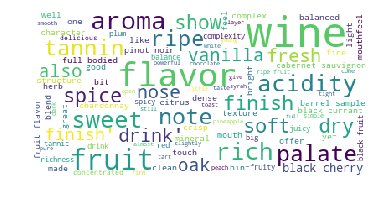

In [82]:
#! pip install wordcloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

The word cloud shows us the frequently mentioned words, such as 'aroma' and 'sweet'.

### Get Word Features From the Review

We also generate the top 10 feature words for quality 3(the lowest) class and quality 8(the highest) class, tring to find out the difference and taking the word as new feature to the wine. 

We choosed 'aromas','rich','sweet' and 'dry' as our 4 new dummy features adding to the dataset.

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Feature Transformation

tfidf_vectorizer = TfidfVectorizer(max_features= 10, stop_words = 'english',strip_accents = 'unicode')
tfidf = tfidf_vectorizer.fit(red['review'])
# get the top 20 features of the overall review 
features = tfidf.get_feature_names()
print(features)

['acidity', 'aromas', 'black', 'cherry', 'finish', 'flavors', 'fruit', 'ripe', 'tannins', 'wine']


In [84]:
#Get features for the wines with quality score 3 
review3 = red[(red['quality']==3)]['review']
tfidf3 = tfidf_vectorizer.fit(review3)
features3 = tfidf3.get_feature_names()
print(features3)

['aromas', 'cherry', 'dry', 'finish', 'flavors', 'fruit', 'palate', 'soft', 'sweet', 'wine']


In [85]:
#Get features for the wines with quality score 8
review8 = red[(red['quality']==8)]['review']
tfidf8 = tfidf_vectorizer.fit(review8)
features8 = tfidf8.get_feature_names()
print(features8)

['black', 'cabernet', 'cherry', 'finish', 'flavors', 'fruit', 'tannins', 'vineyard', 'wine', 'years']


In [86]:
# Take the difference of group3 and group8 
unique = set(features8).symmetric_difference( set(features3) )
print(unique)

{'soft', 'tannins', 'vineyard', 'sweet', 'cabernet', 'aromas', 'dry', 'black', 'years', 'palate'}


In [87]:
#Generate new features form review
red['aromas'] = red['review'].str.contains('aromas').astype(int)
red['rich'] = red['review'].str.contains('rich').astype(int)
red['sweet'] = red['review'].str.contains('sweet').astype(int)
red['dry'] = red['review'].str.contains('dry').astype(int)
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,review,aromas,rich,sweet,dry
0,6.7,0.760,0.02,1.80,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3,"Smells caramelly and Port-like, with raisiny f...",0,0,0,1
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3,Undurraga has never been know for sparkling wi...,0,0,0,0
2,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,3,Barnyard aromas with coffee grinds and lemony ...,1,0,0,0
3,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.00,3,"Rich aromas of vanilla, smoke, flowers and fre...",1,0,0,0
4,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.70,3,"Rich aromas of vanilla, smoke, flowers and fre...",1,0,0,0


### Truncated SVD

Using reviews for clustering and generate labels by cluster. 

In [88]:
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

tfidf_vectorizer = TfidfVectorizer(max_features= 20, stop_words = 'english', strip_accents = 'unicode')
tfidf_trans = tfidf_vectorizer.fit_transform(red['review'])

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=10)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)

# Fit
pipeline.fit(tfidf_trans)

# Calculate the cluster labels: labels
labels = pipeline.predict(tfidf_trans)

df = pd.DataFrame({'label': labels, 'quality': red['quality'],'review':red['review']})
print(df.sort_values('label'))

red['label'] = labels
red.head()

      label  quality                                             review
1831      0        6  If this wine is any indication, now is the tim...
630       0        4  Here's a wine that aspires to complexity and o...
631       0        4  Here's a wine with loads of citrus, yellow fru...
2487      0        7  An awesome Pinot Noir—it's hard to find words ...
634       0        4  Feels a bit common, with one-dimensional flavo...
...     ...      ...                                                ...
1853      5        6  This delicious, compelling, full-bodied wine b...
1867      5        6  Big, powerful brush strokes of ripe fruits, sp...
1869      5        6  This is all about power and rich fruit. A grea...
1813      5        6  Nebbiolo, the grape, and Nubiola, the designat...
1622      5        5  A pure Syrah cuvée (not allowed under the appe...

[3246 rows x 3 columns]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,review,aromas,rich,sweet,dry,label
0,6.7,0.760,0.02,1.80,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3,"Smells caramelly and Port-like, with raisiny f...",0,0,0,1,5
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3,Undurraga has never been know for sparkling wi...,0,0,0,0,5
2,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,3,Barnyard aromas with coffee grinds and lemony ...,1,0,0,0,4
3,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.00,3,"Rich aromas of vanilla, smoke, flowers and fre...",1,0,0,0,5
4,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.70,3,"Rich aromas of vanilla, smoke, flowers and fre...",1,0,0,0,5


In [89]:
pd.crosstab(red['quality'],red['label'])

label,0,1,2,3,4,5
quality,,,,,,
3,156,90,54,37,127,77
4,122,67,55,61,143,93
5,71,42,125,63,127,113
6,76,59,139,87,79,101
7,71,55,170,100,55,90
8,48,63,160,144,55,71


The cluster results do not match the quality score well, so we will not use the generated labels for model fitting. It is expected since the reviews are randomly matched in from a different dataset.

In [90]:
# combine the 4 features from reviews with the original 11 features
X_15 = red.drop(columns=['quality','review','label'])
X_15.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,aromas,rich,sweet,dry
0,6.7,0.760,0.02,1.80,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,0,0,0,1
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,0,0,0,0
2,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,1,0,0,0
3,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.00,1,0,0,0
4,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.70,1,0,0,0


In [91]:
# fit 6-class models again with 15 features
run_model2(X_15,red['quality'])

,models,acc_mean,acc_high,acc_low,acc_std,f1_mean,f1_high,f1_low,f1_std
5,Random Forest,0.830,0.843,0.824,0.007,0.825,0.839,0.818,0.007
2,Bagging Classifier,0.828,0.843,0.809,0.014,0.821,0.837,0.802,0.015
3,XG Boosting,0.787,0.813,0.763,0.016,0.777,0.805,0.756,0.016
1,Decision Tree,0.772,0.795,0.736,0.020,0.768,0.791,0.732,0.020
7,Ada Boosting,0.771,0.784,0.747,0.015,0.767,0.781,0.742,0.015
4,SVC(RBF),0.706,0.753,0.682,0.025,0.695,0.747,0.665,0.028
6,KNN,0.667,0.682,0.656,0.009,0.642,0.664,0.623,0.015
0,Logistic Regression,0.543,0.559,0.511,0.017,0.515,0.529,0.478,0.019


The accuracy for most models decreased slightly. It is expected, given that the reviews do not come from the same dataset. We introduced more noise by random matching the reviews. Although we tried divide the review datasets into 6 classes by points to match the quality dataset, the divding rules were self defined, it is very likely that class 3 do not represent the same quality in the two dataset. 

Now, we are confident to predict the wine quality on the houldout set.

# Predicting on holdout set

In [92]:
# data processing 
# divide the test set quality into 2 classes using the same rule as train set 
y_test2class = (y_test>=6)*1
# divide the test set quality into 3 classes using the same rule as train set 
y_test3class=[]
for i in y_test:
    if i >=1 and i <= 5:
        y_test3class.append('1')
    elif i == 6 :
        y_test3class.append('2')
    elif i >= 7:
        y_test3class.append('3')

## 6-class

In [93]:
# fit the random forest model using the parameters from gridsearch on the entire train set
rf = RandomForestClassifier(random_state=0,n_estimators=60,min_samples_leaf=1, min_samples_split=4,criterion='entropy')
rf.fit(X_resampled,y_resampled)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [94]:
# predict on the test set (6-classes)
y_predict = rf.predict(X_test2)

In [95]:
# accuracy 
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.6320754716981132

In [96]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           3       0.25      0.50      0.33         2
           4       0.09      0.09      0.09        11
           5       0.77      0.68      0.72       135
           6       0.63      0.65      0.64       127
           7       0.49      0.56      0.52        39
           8       0.29      0.50      0.36         4

    accuracy                           0.63       318
   macro avg       0.42      0.50      0.45       318
weighted avg       0.65      0.63      0.64       318



The accuracy socre is much lower then the test set, which indicates overfitting. 
Using SMOTE, we increased the sample size from 1589 to 3246, by over 100%... the model were overfitted on the SMOTE generated 'fake' points. 

## 2-class

In [97]:
# fit the voting classifier model on the entire train set
vc.fit(X_train,y_train2)
# predict the test set
y_VCpredict = vc.predict(X_test)
# accuracy score
accuracy_score(y_test2class,y_VCpredict)

0.8333333333333334

In [98]:
print(classification_report(y_test2class,y_VCpredict))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       148
           1       0.83      0.86      0.85       170

    accuracy                           0.83       318
   macro avg       0.83      0.83      0.83       318
weighted avg       0.83      0.83      0.83       318



The accuracy score is actually higher than the train set. Using only the original data points, the model does not have the overfitting problem.  

## 3-class

In [99]:
# fit the random forest model using the parameters from gridsearch on the entire train set
rf2 = RandomForestClassifier(random_state=0,n_estimators=70,criterion= 'entropy', min_samples_leaf= 1, 
                            min_samples_split= 4)

rf2.fit(X_train,tiers)
# predict on the test set 
y_hat = rf2.predict(X_test)
# accuracy score
accuracy_score(y_test3class,y_hat)

0.7044025157232704

In [100]:
print(classification_report(y_test3class,y_hat))

              precision    recall  f1-score   support

           1       0.82      0.78      0.80       148
           2       0.62      0.71      0.66       127
           3       0.60      0.42      0.49        43

    accuracy                           0.70       318
   macro avg       0.68      0.64      0.65       318
weighted avg       0.71      0.70      0.70       318



Similar to the 2-class model, the accuracy score is higher in the test set. The model does not have the overfitting problem.  

## content based recommendation

Using the reviews data, we can also build a content based recommendation system. 

In [101]:
import pandas as pd
#from rake_nltk import Rake
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [102]:
# create a dataframe with only the reviews
df = red[['review']]
# generate WineId for reference
df['ID'] = range(0,len(df['review']))
df.head()

,review,ID
0,"Smells caramelly and Port-like, with raisiny f...",0
1,Undurraga has never been know for sparkling wi...,1
2,Barnyard aromas with coffee grinds and lemony ...,2
3,"Rich aromas of vanilla, smoke, flowers and fre...",3
4,"Rich aromas of vanilla, smoke, flowers and fre...",4


In [103]:
# putting the review in a list of words
df['review'] = df['review'].map(lambda x: x.lower().replace(',',' ').replace('.',' ').replace('!', ' '))
df.head()

,review,ID
0,smells caramelly and port-like with raisiny f...,0
1,undurraga has never been know for sparkling wi...,1
2,barnyard aromas with coffee grinds and lemony ...,2
3,rich aromas of vanilla smoke flowers and fre...,3
4,rich aromas of vanilla smoke flowers and fre...,4


In [104]:
# instantiating and generating the count matrix
count = CountVectorizer()
count_matrix = count.fit_transform(df['review'])

# creating a Series for the movie titles so they are associated to an ordered numerical
# list I will use later to match the indexes
indices = pd.Series(df.index)
indices[:5]

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [105]:
# generating the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim[0:5]

array([[1.        , 0.25663245, 0.22011273, ..., 0.18431027, 0.17586311,
        0.20412415],
       [0.25663245, 1.        , 0.36797942, ..., 0.42569997, 0.46421673,
        0.42656259],
       [0.22011273, 0.36797942, 1.        , ..., 0.40163346, 0.40258098,
        0.32349832],
       [0.24743583, 0.34471463, 0.41392469, ..., 0.39904344, 0.37712858,
        0.34092648],
       [0.24743583, 0.34471463, 0.41392469, ..., 0.39904344, 0.37712858,
        0.34092648]])

In [106]:
# function that takes in wineID as input and returns the top 10 recommended wines
def recommendations(wineID, cosine_sim = cosine_sim):
    
    recommended_wine = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == wineID].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_wine.append(list(df.index)[i])
        
    return recommended_wine

In [107]:
# print the top 10 recommendations given a WineId, e.g. 2
recommendations(2)

[480, 1143, 713, 486, 802, 699, 2036, 1215, 30, 1333]